In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
# Read in daily ridership data
file_path = os.path.join('..','assets', 'MTA_Daily_Ridership_Data__Beginning_2020_20241001.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Read in hourly bus ridership data
bus_file_path = os.path.join('..', 'assets', 'hourly_bus_ridership.csv')
hourly_bus_df = pd.read_csv(bus_file_path)

# Read in hourly subway ridership data
subway_file_path = os.path.join('..', 'assets', 'hourly_subway_ridership_2019.csv')
hourly_subway_df = pd.read_csv(subway_file_path)

# Convert 'hour' column to datetime for both datasets
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour'])
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour'])

# Display the first few rows of each dataset
print("Hourly Bus Ridership Data:")
print(hourly_bus_df.head())
print("\nHourly Subway Ridership Data:")
print(hourly_subway_df.head())



Hourly Bus Ridership Data:
                        hour  total_ridership
0  2022-02-01 19:00:00-05:00      4910.510998
1  2022-02-01 20:00:00-05:00      1845.069004
2  2022-02-01 21:00:00-05:00      1012.700000
3  2022-02-01 22:00:00-05:00      1494.125002
4  2022-02-01 23:00:00-05:00      5635.072002

Hourly Subway Ridership Data:
                        hour  total_ridership
0  2020-06-30 20:00:00-04:00           6279.0
1  2020-06-30 21:00:00-04:00             42.0
2  2020-06-30 22:00:00-04:00             35.0
3  2020-06-30 23:00:00-04:00             19.0
4  2020-07-01 00:00:00-04:00           6357.0


In [3]:
import pytz
from datetime import timedelta

# For bus data
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour'], utc=True)
hourly_bus_df['hour'] = hourly_bus_df['hour'].dt.tz_convert('America/New_York')
daily_bus_df = hourly_bus_df.set_index('hour').resample('D', offset=timedelta(hours=4)).sum().reset_index()
daily_bus_df['hour'] = daily_bus_df['hour'].dt.tz_localize(None)
daily_bus_df = daily_bus_df.rename(columns={'hour': 'Date'})

# For subway data
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour'], utc=True)
hourly_subway_df['hour'] = hourly_subway_df['hour'].dt.tz_convert('America/New_York')
daily_subway_df = hourly_subway_df.set_index('hour').resample('D', offset=timedelta(hours=4)).sum().reset_index()
daily_subway_df['hour'] = daily_subway_df['hour'].dt.tz_localize(None)
daily_subway_df = daily_subway_df.rename(columns={'hour': 'Date'})


# Display the first few rows of each dataset
print("Daily Bus Ridership Data:")
print(daily_bus_df.head())
print("\nDaily Subway Ridership Data:")
print(daily_subway_df.head())

# Optionally, you can compare with the original daily data
print("\nOriginal Daily Data:")
print(df[['Date', 'Subways: Total Estimated Ridership', 'Buses: Total Estimated Ridership']].head())

# Calculate and print the total ridership for each dataset
print("\nTotal Ridership Comparison:")
print(f"Bus (from hourly data): {daily_bus_df['total_ridership'].sum():,}")
print(f"Subway (from hourly data): {daily_subway_df['total_ridership'].sum():,}")
print(f"Bus (from daily data): {df['Buses: Total Estimated Ridership'].sum():,}")
print(f"Subway (from daily data): {df['Subways: Total Estimated Ridership'].sum():,}")


Daily Bus Ridership Data:
                 Date  total_ridership
0 2022-02-01 04:00:00     2.990847e+05
1 2022-02-02 04:00:00     1.086627e+06
2 2022-02-03 04:00:00     1.035642e+06
3 2022-02-04 04:00:00     7.549212e+05
4 2022-02-05 04:00:00     5.300866e+05

Daily Subway Ridership Data:
                 Date  total_ridership
0 2020-06-30 04:00:00         228719.0
1 2020-07-01 04:00:00        1123527.0
2 2020-07-02 04:00:00        1083803.0
3 2020-07-03 04:00:00         783859.0
4 2020-07-04 04:00:00         585769.0

Original Daily Data:
         Date  Subways: Total Estimated Ridership  \
0  03/01/2020                             2212965   
1  03/02/2020                             5329915   
2  03/03/2020                             5481103   
3  03/04/2020                             5498809   
4  03/05/2020                             5496453   

   Buses: Total Estimated Ridership  
0                            984908  
1                           2209066  
2                    

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/3706868747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


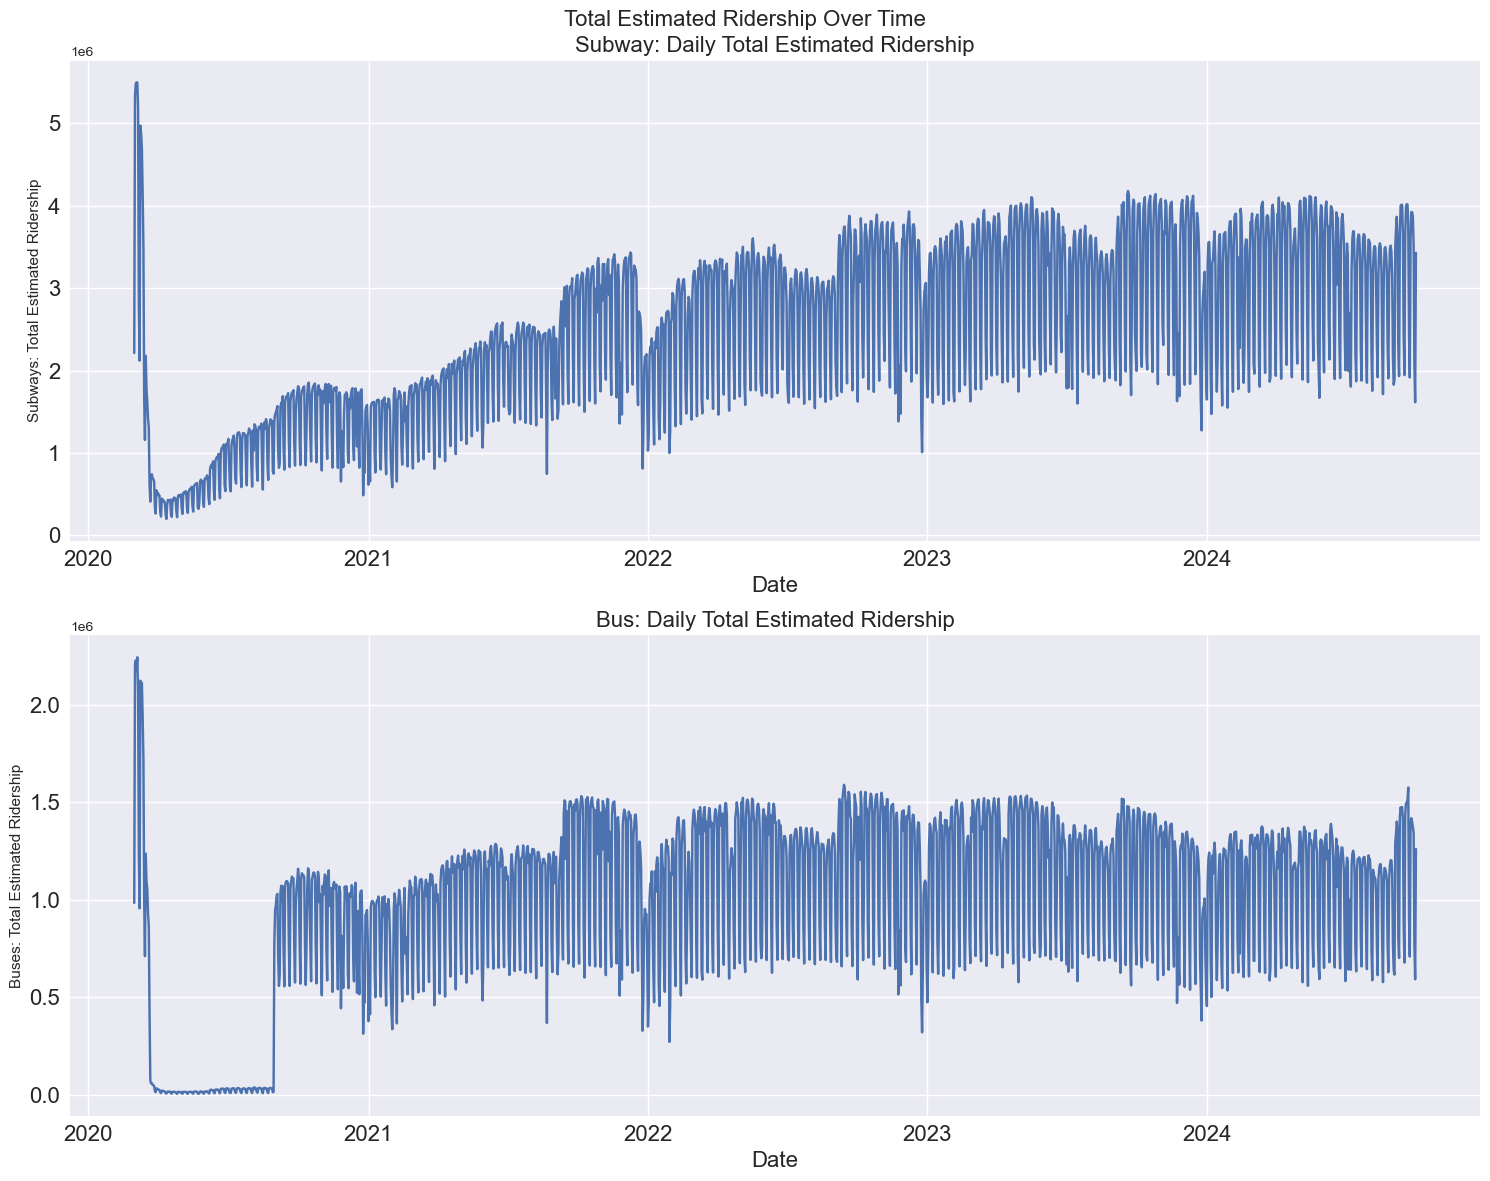

In [4]:


# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Total Estimated Ridership Over Time', fontsize=16)

# Plot for Bus
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0])
axs[0].set_title('Subway: Daily Total Estimated Ridership', fontsize=16)
axs[0].set_xlabel('Date', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=16)

# Plot for Subway
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[1])
axs[1].set_title('Bus: Daily Total Estimated Ridership', fontsize=16)
axs[1].set_xlabel('Date', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=16)

# # Plot for LIRR
# sns.lineplot(x='Date', y='LIRR: Total Estimated Ridership', data=df, ax=axs[2])
# axs[2].set_title('LIRR Ridership', fontsize=16)
# axs[2].tick_params(axis='both', which='major', labelsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/3445591482.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


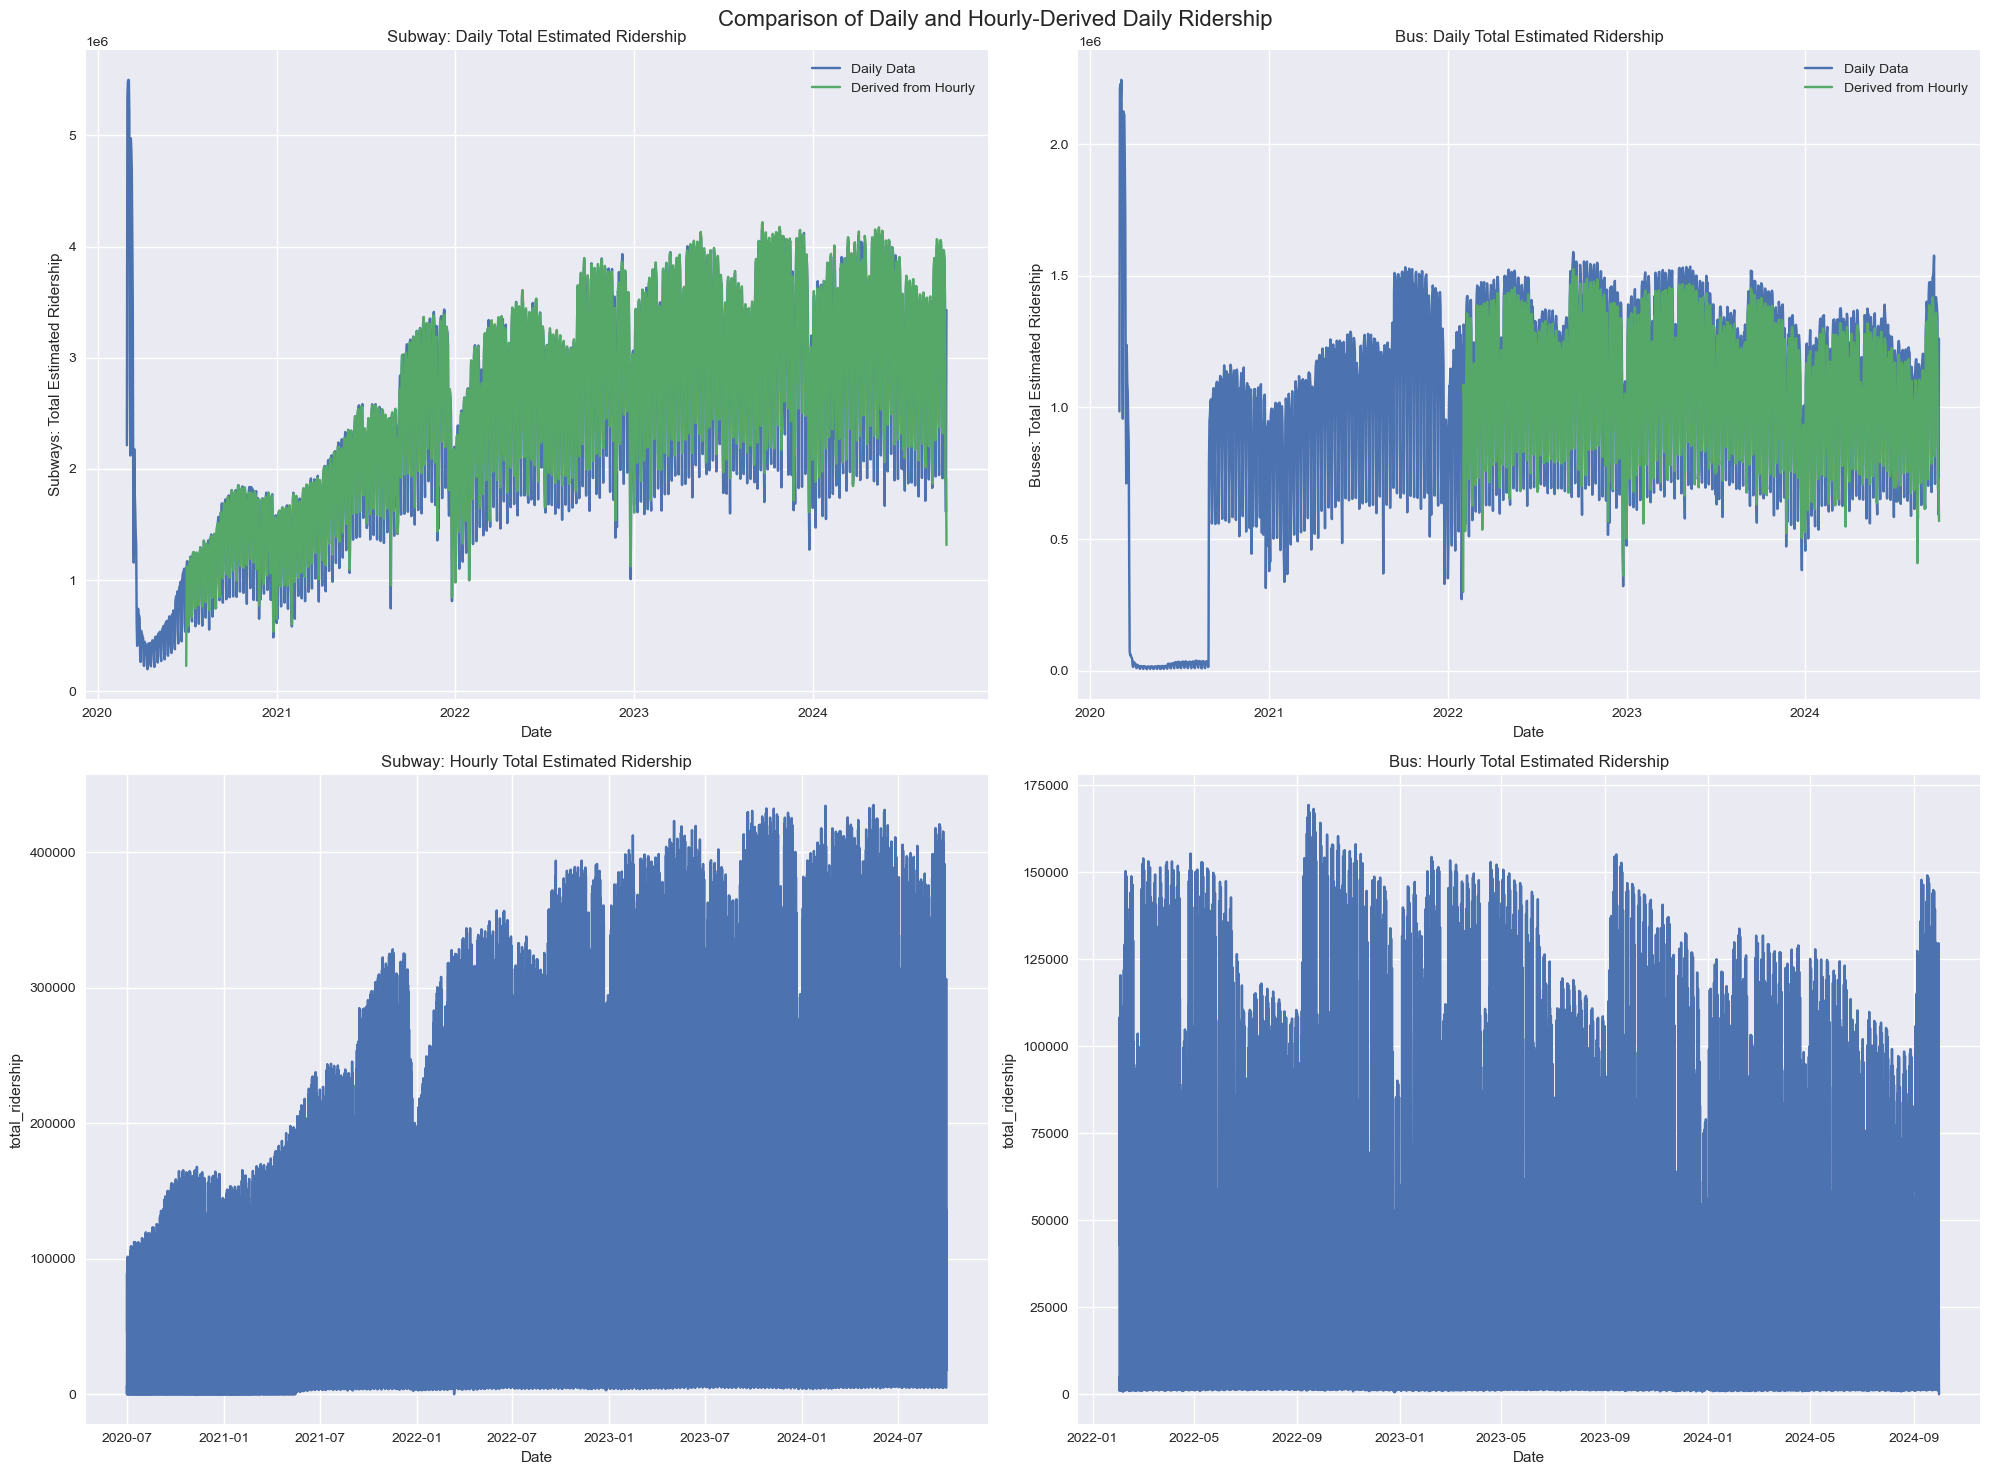

In [5]:
# Convert 'hour' column to datetime for hourly data and remove timezone info
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour']).dt.tz_localize(None)
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour']).dt.tz_localize(None)

# Ensure 'Date' column in daily_subway_df and daily_bus_df has no timezone info
daily_subway_df['Date'] = pd.to_datetime(daily_subway_df['Date']).dt.tz_localize(None)
daily_bus_df['Date'] = pd.to_datetime(daily_bus_df['Date']).dt.tz_localize(None)

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Comparison of Daily and Hourly-Derived Daily Ridership', fontsize=16)

# Plot for Subway
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0, 0], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_subway_df, ax=axs[0, 0], label='Derived from Hourly')
axs[0, 0].set_title('Subway: Daily Total Estimated Ridership')
axs[0, 0].set_xlabel('Date')
axs[0, 0].legend()

# Plot for Bus
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[0, 1], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_bus_df, ax=axs[0, 1], label='Derived from Hourly')
axs[0, 1].set_title('Bus: Daily Total Estimated Ridership')
axs[0, 1].set_xlabel('Date')
axs[0, 1].legend()

# Plot hourly data for Subway
sns.lineplot(x='hour', y='total_ridership', data=hourly_subway_df, ax=axs[1, 0])
axs[1, 0].set_title('Subway: Hourly Total Estimated Ridership')
axs[1, 0].set_xlabel('Date')

# Plot hourly data for Bus
sns.lineplot(x='hour', y='total_ridership', data=hourly_bus_df, ax=axs[1, 1])
axs[1, 1].set_title('Bus: Hourly Total Estimated Ridership')
axs[1, 1].set_xlabel('Date')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

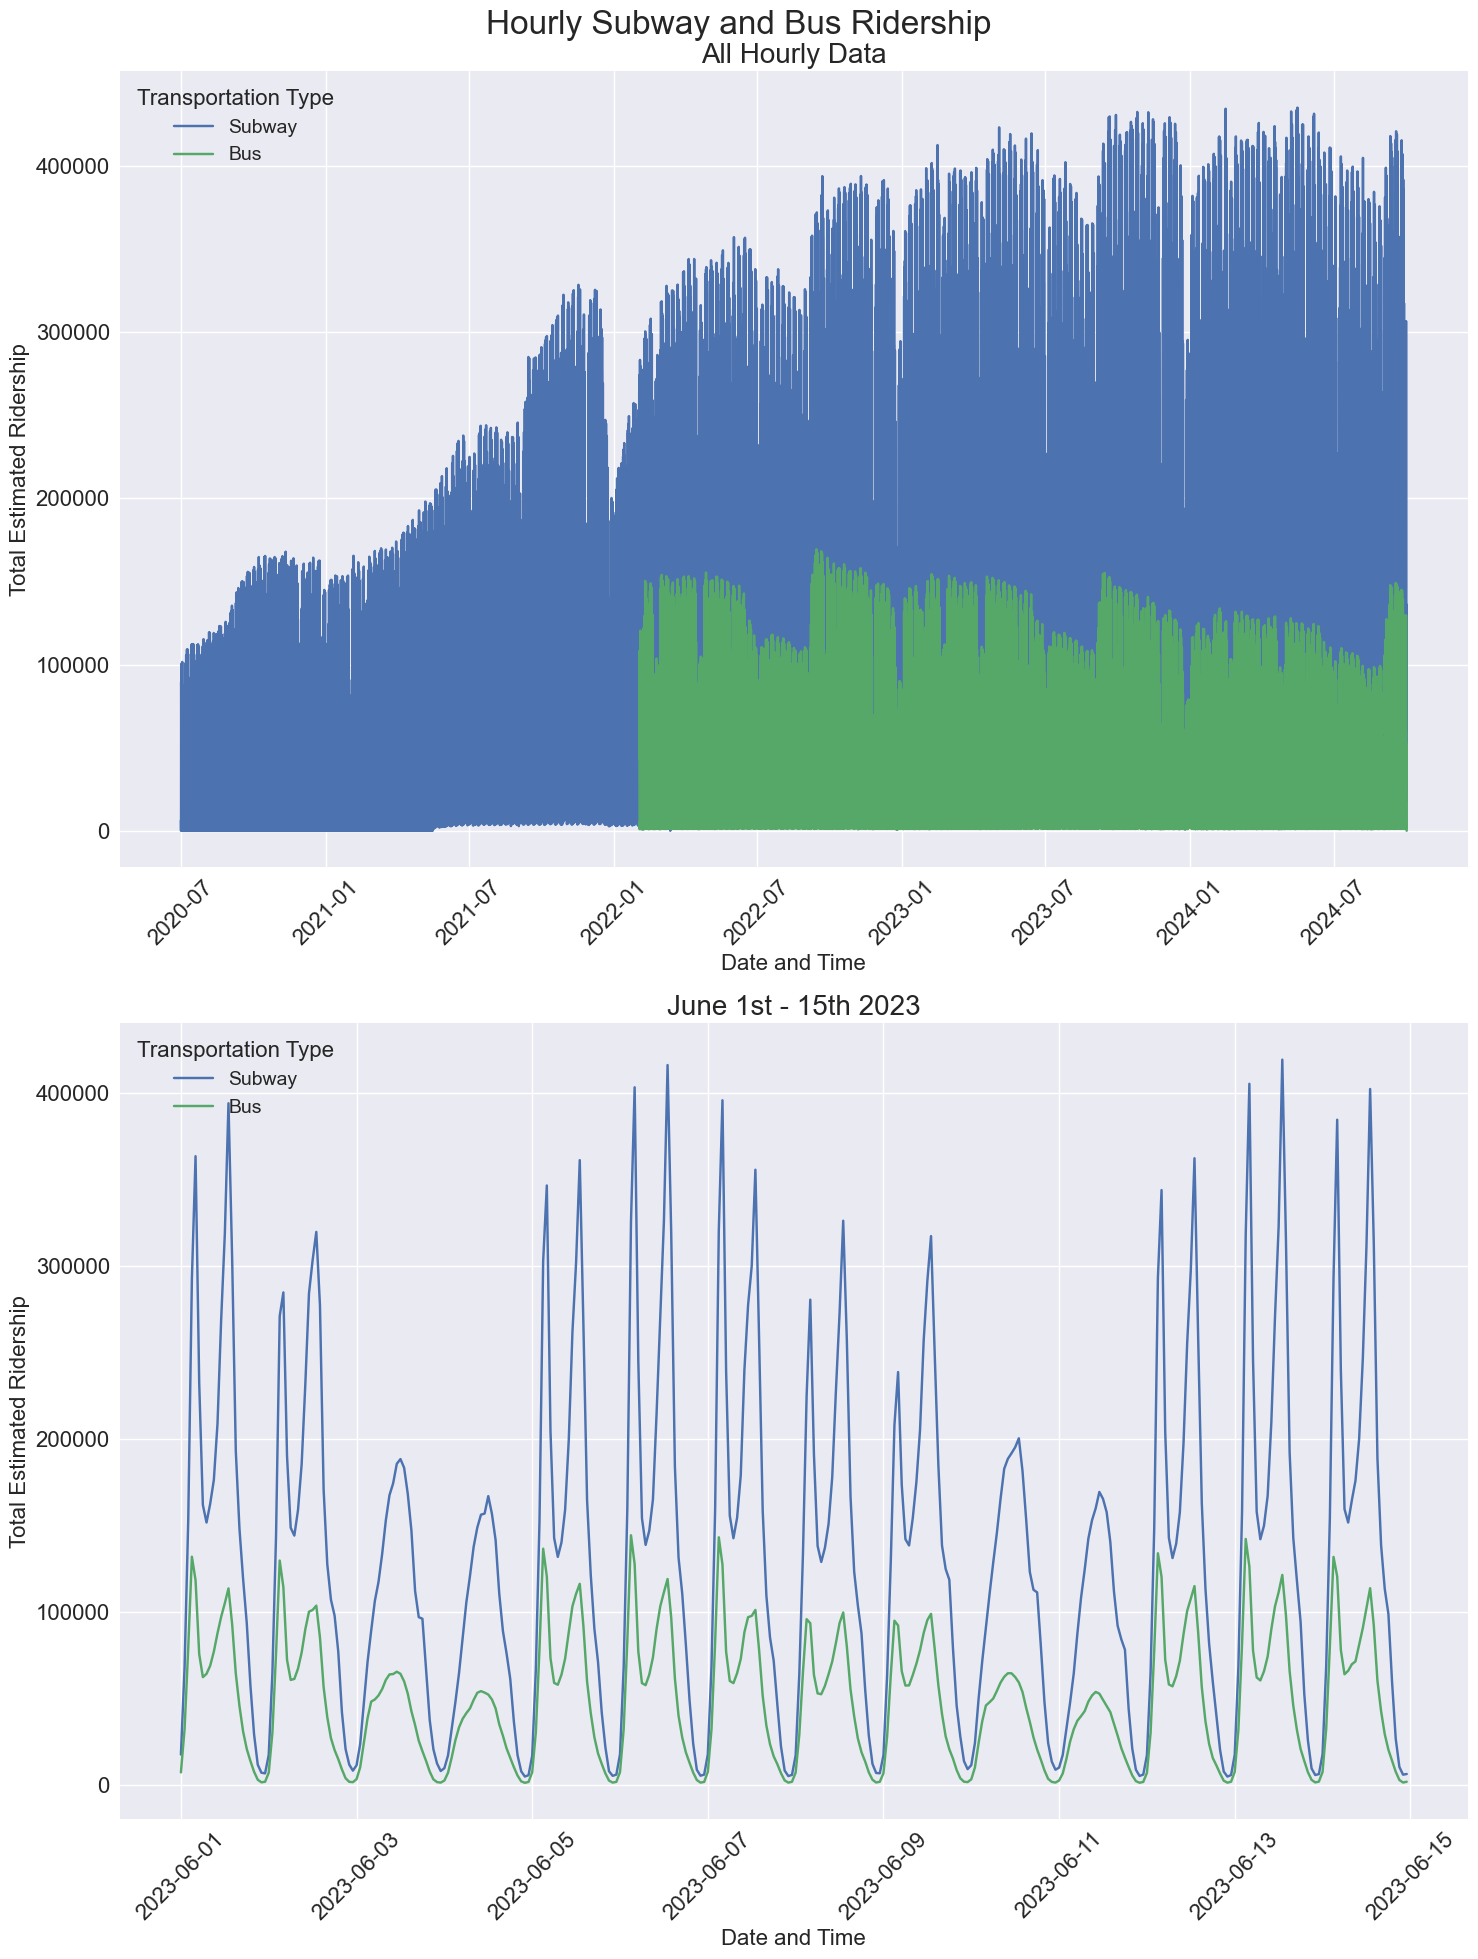

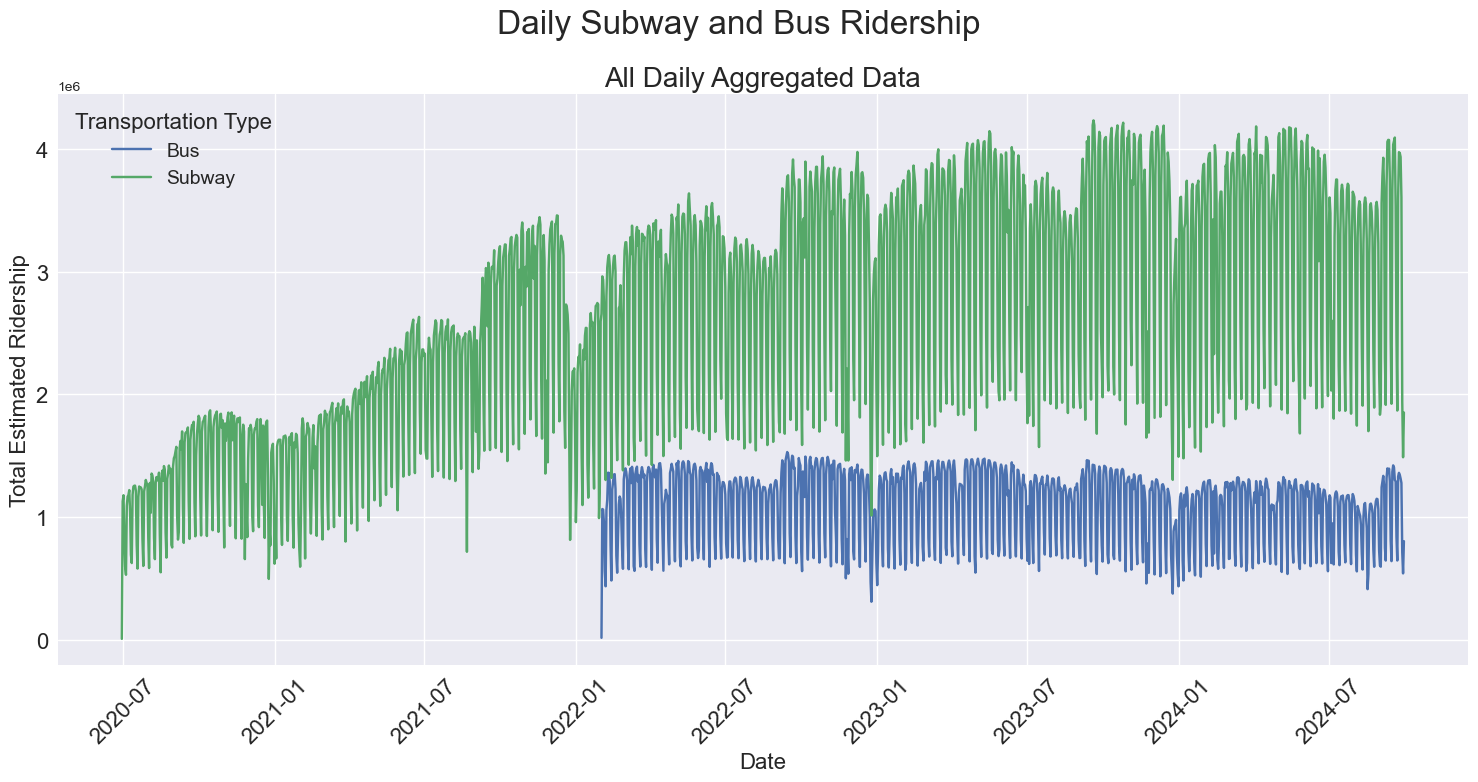

In [6]:
# Combine subway and bus hourly data
hourly_subway_df['transportation'] = 'Subway'
hourly_bus_df['transportation'] = 'Bus'
combined_hourly_df = pd.concat([hourly_subway_df, hourly_bus_df])

# Aggregate hourly data to daily
daily_combined_df = combined_hourly_df.groupby(['transportation', combined_hourly_df['hour'].dt.date])['total_ridership'].sum().reset_index()
daily_combined_df['hour'] = pd.to_datetime(daily_combined_df['hour'])

# Set up the plots with larger font sizes
plt.rcParams.update({'font.size': 14})  # Increase the default font size

fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
fig1.suptitle('Hourly Subway and Bus Ridership', fontsize=24)

# Plot subway and bus ridership for all hourly data
sns.lineplot(x='hour', y='total_ridership', hue='transportation', data=combined_hourly_df, ax=ax1)
ax1.set_title('All Hourly Data', fontsize=20)
ax1.set_xlabel('Date and Time', fontsize=16)
ax1.set_ylabel('Total Estimated Ridership', fontsize=16)
ax1.legend(title='Transportation Type', title_fontsize='16', fontsize='14')
ax1.tick_params(axis='x', rotation=45, labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

# Select a random month in 2023
start_month = pd.Timestamp('2023-06-01')
end_month = pd.Timestamp('2023-06-15')

# Filter data for the random month
random_month_data = combined_hourly_df[(combined_hourly_df['hour'] >= start_month) & (combined_hourly_df['hour'] < end_month)]

# Plot subway and bus ridership for the random month
sns.lineplot(x='hour', y='total_ridership', hue='transportation', data=random_month_data, ax=ax2)
ax2.set_title('June 1st - 15th 2023', fontsize=20)
ax2.set_xlabel('Date and Time', fontsize=16)
ax2.set_ylabel('Total Estimated Ridership', fontsize=16)
ax2.legend(title='Transportation Type', title_fontsize='16', fontsize='14')
ax2.tick_params(axis='x', rotation=45, labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

# Adjust layout and display the first plot
plt.tight_layout()
plt.show()

# Create a new figure for the daily aggregated data
fig2, ax3 = plt.subplots(figsize=(15, 8))
fig2.suptitle('Daily Subway and Bus Ridership', fontsize=24)

# Plot subway and bus ridership for all daily aggregated data
sns.lineplot(x='hour', y='total_ridership', hue='transportation', data=daily_combined_df, ax=ax3)
ax3.set_title('All Daily Aggregated Data', fontsize=20)
ax3.set_xlabel('Date', fontsize=16)
ax3.set_ylabel('Total Estimated Ridership', fontsize=16)
ax3.legend(title='Transportation Type', title_fontsize='16', fontsize='14')
ax3.tick_params(axis='x', rotation=45, labelsize=16)
ax3.tick_params(axis='y', labelsize=16)

# Adjust layout and display the second plot
plt.tight_layout()
plt.show()


/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/2438362871.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


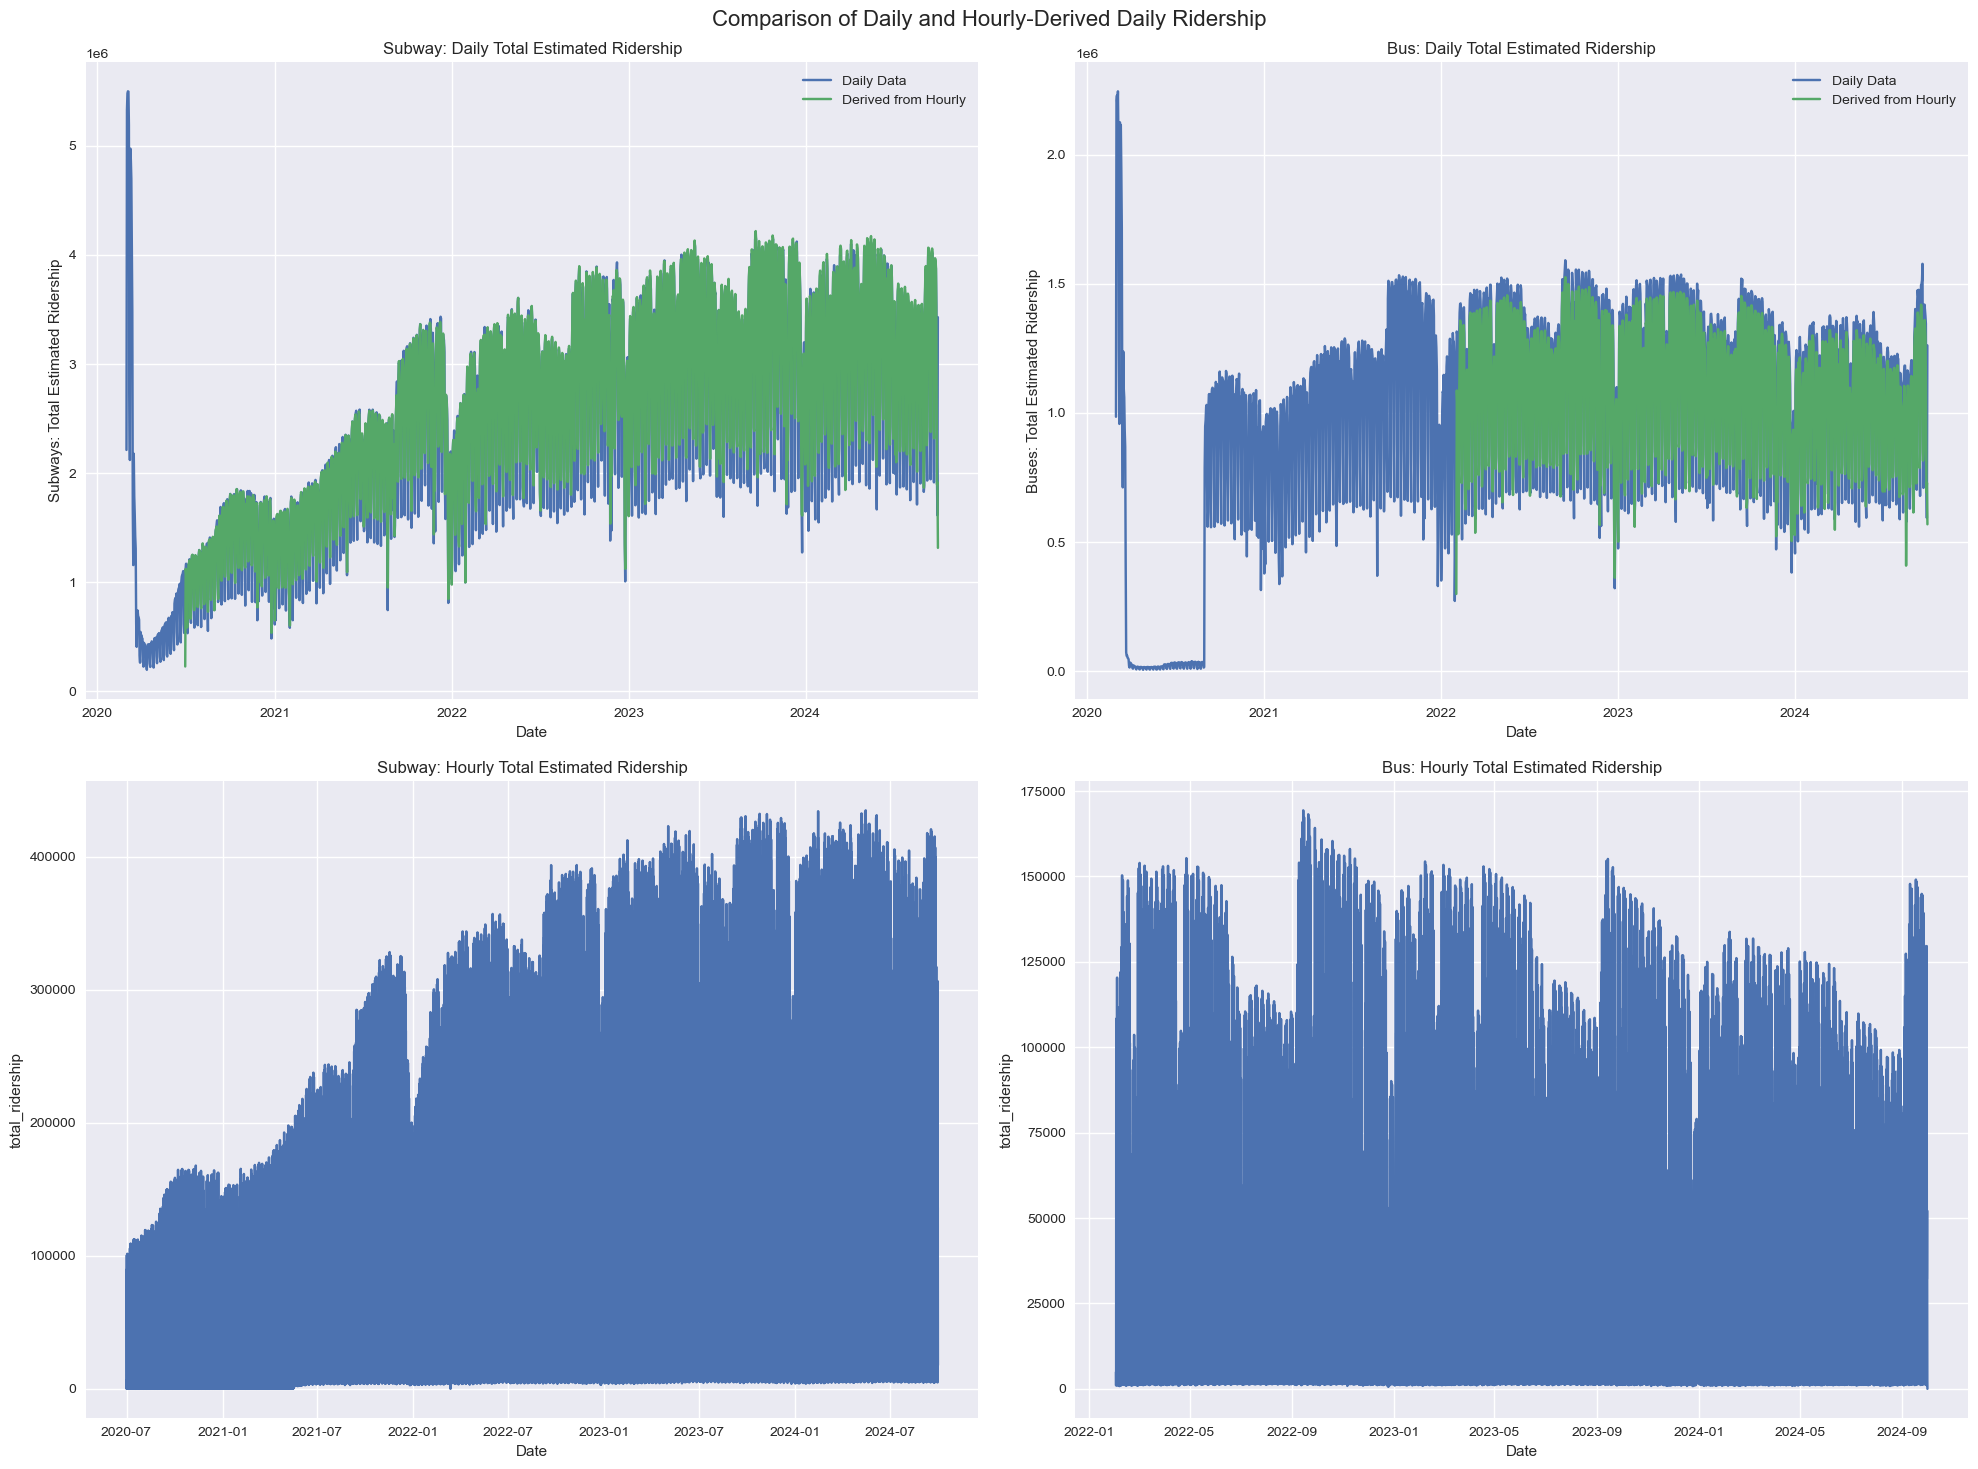

In [7]:
# Convert 'hour' column to datetime for hourly data and remove timezone info
hourly_bus_df['hour'] = pd.to_datetime(hourly_bus_df['hour']).dt.tz_localize(None)
hourly_subway_df['hour'] = pd.to_datetime(hourly_subway_df['hour']).dt.tz_localize(None)

# Ensure 'Date' column in daily_subway_df and daily_bus_df has no timezone info
daily_subway_df['Date'] = pd.to_datetime(daily_subway_df['Date']).dt.tz_localize(None)
daily_bus_df['Date'] = pd.to_datetime(daily_bus_df['Date']).dt.tz_localize(None)

# Convert 'Date' column in df to datetime without timezone
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Comparison of Daily and Hourly-Derived Daily Ridership', fontsize=16)

# Plot for Subway
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0, 0], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_subway_df, ax=axs[0, 0], label='Derived from Hourly')
axs[0, 0].set_title('Subway: Daily Total Estimated Ridership')
axs[0, 0].set_xlabel('Date')
axs[0, 0].legend()

# Plot for Bus
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[0, 1], label='Daily Data')
sns.lineplot(x='Date', y='total_ridership', data=daily_bus_df, ax=axs[0, 1], label='Derived from Hourly')
axs[0, 1].set_title('Bus: Daily Total Estimated Ridership')
axs[0, 1].set_xlabel('Date')
axs[0, 1].legend()

# Plot hourly data for Subway
sns.lineplot(x='hour', y='total_ridership', data=hourly_subway_df, ax=axs[1, 0])
axs[1, 0].set_title('Subway: Hourly Total Estimated Ridership')
axs[1, 0].set_xlabel('Date')

# Plot hourly data for Bus
sns.lineplot(x='hour', y='total_ridership', data=hourly_bus_df, ax=axs[1, 1])
axs[1, 1].set_title('Bus: Hourly Total Estimated Ridership')
axs[1, 1].set_xlabel('Date')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


20 biggest outliers for Subway Ridership - MSTL Decomposition:
Time: 2023-07-04 04:00:00, Residual: 198526.47520988228
Time: 2024-05-27 04:00:00, Residual: 197077.53756985813
Time: 2024-07-04 04:00:00, Residual: 175594.92948963505
Time: 2024-09-02 04:00:00, Residual: 171998.88340309836
Time: 2023-05-29 04:00:00, Residual: 170629.08714916886
Time: 2023-07-04 13:00:00, Residual: 169608.13150491088
Time: 2023-11-23 12:00:00, Residual: 169552.08555272862
Time: 2024-05-27 13:00:00, Residual: 168687.28464273177
Time: 2024-05-27 03:00:00, Residual: 167642.98412522842
Time: 2023-09-04 04:00:00, Residual: 159174.305989929
Time: 2022-11-24 12:00:00, Residual: 158050.44963212096
Time: 2023-05-29 03:00:00, Residual: 155777.05890513118
Time: 2024-06-19 04:00:00, Residual: 154374.27736129446
Time: 2024-02-13 03:00:00, Residual: 154064.38360992636
Time: 2023-11-23 03:00:00, Residual: 154012.420127289
Time: 2024-07-04 13:00:00, Residual: 149681.54391104163
Time: 2024-09-02 03:00:00, Residual: 148726.

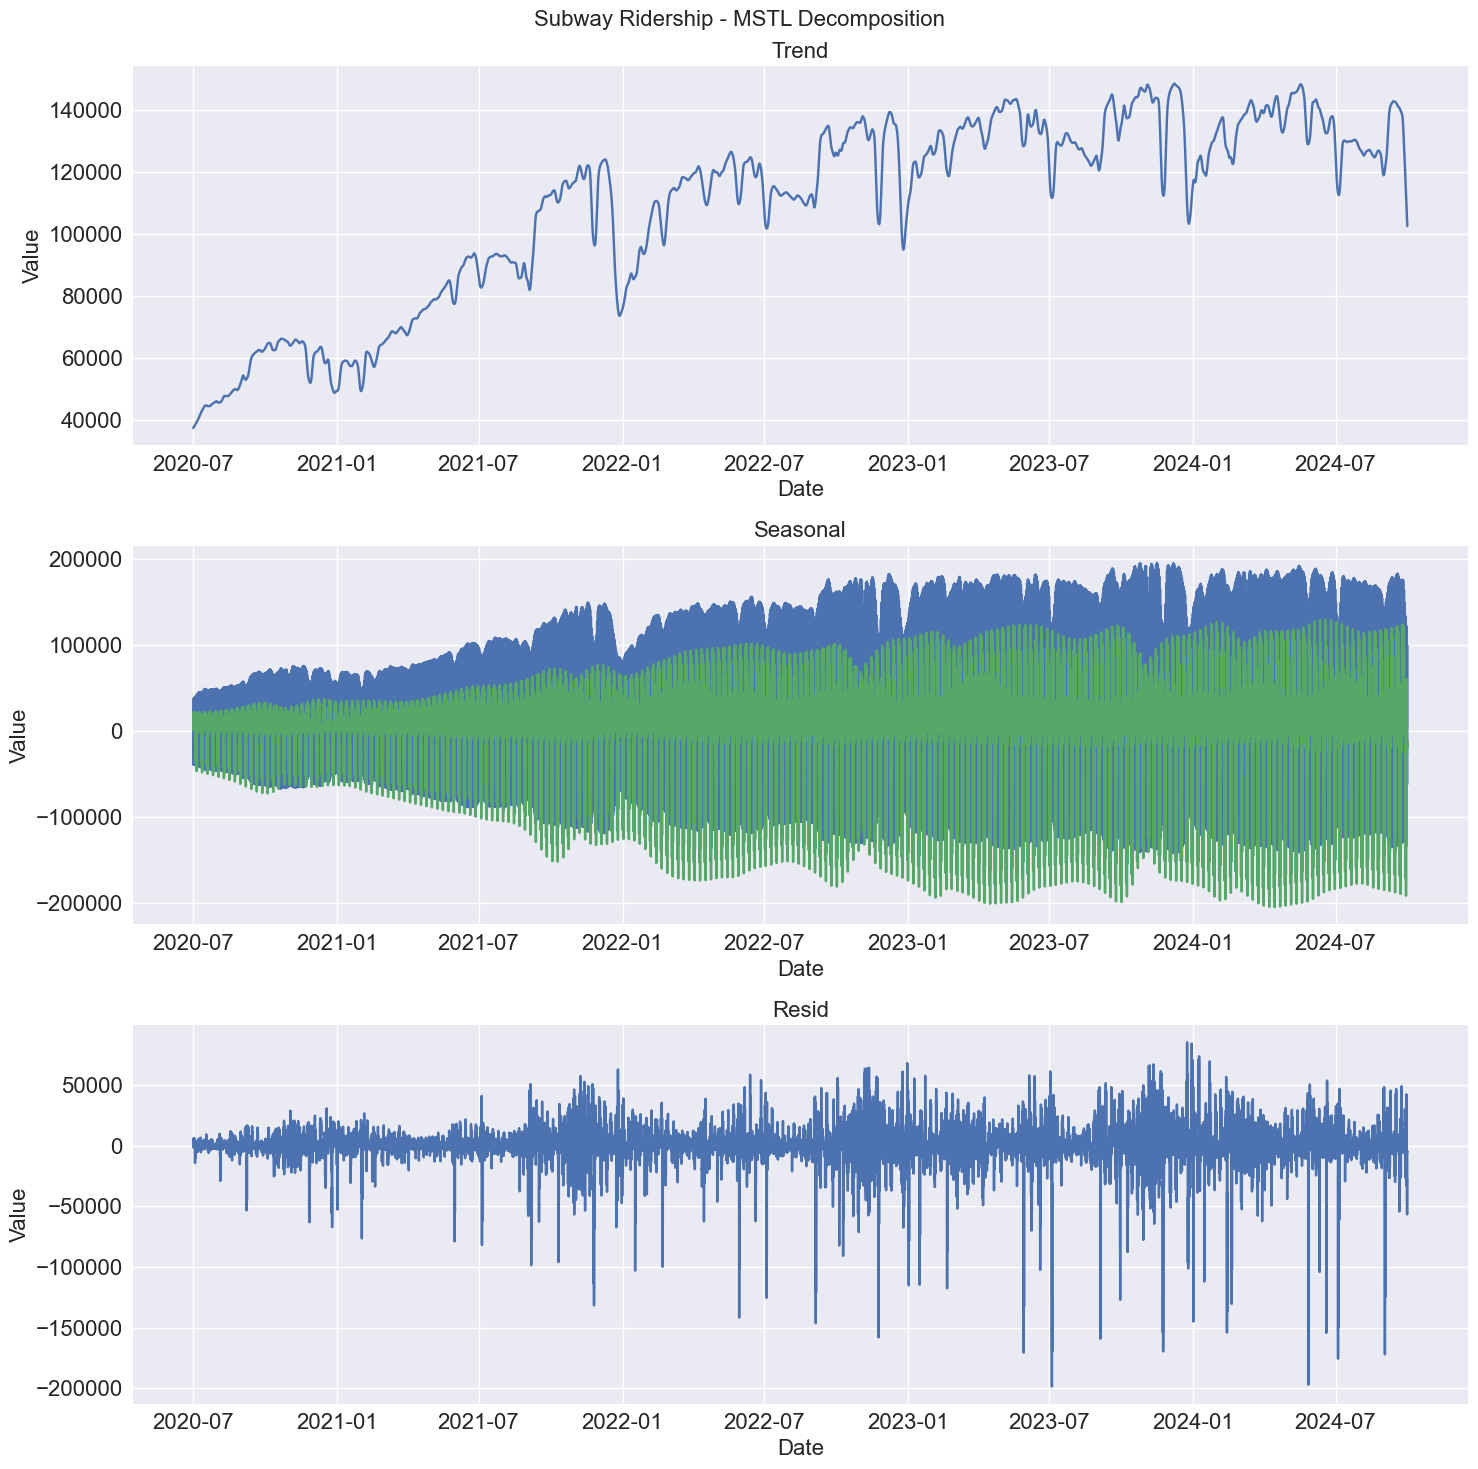


20 biggest outliers for Bus Ridership - MSTL Decomposition:
Time: 2023-05-29 03:00:00, Residual: 69570.01002272559
Time: 2022-05-30 03:00:00, Residual: 68657.32580020634
Time: 2022-11-24 02:00:00, Residual: 67851.80017541688
Time: 2024-05-27 03:00:00, Residual: 62287.81536529222
Time: 2024-09-02 03:00:00, Residual: 61115.92557846412
Time: 2023-07-04 03:00:00, Residual: 61046.62111771108
Time: 2022-09-05 03:00:00, Residual: 59203.163098626086
Time: 2023-11-23 02:00:00, Residual: 57941.191035451055
Time: 2022-11-24 03:00:00, Residual: 57017.59515415202
Time: 2023-07-04 04:00:00, Residual: 56157.31027993582
Time: 2023-09-04 03:00:00, Residual: 54280.947884939036
Time: 2023-05-29 04:00:00, Residual: 53720.22992842918
Time: 2022-05-30 04:00:00, Residual: 51945.88708245566
Time: 2022-10-10 03:00:00, Residual: 51631.484480159765
Time: 2024-05-27 04:00:00, Residual: 51039.69432296734
Time: 2023-11-23 03:00:00, Residual: 50754.87863225131
Time: 2023-01-02 02:00:00, Residual: 49733.95290666794


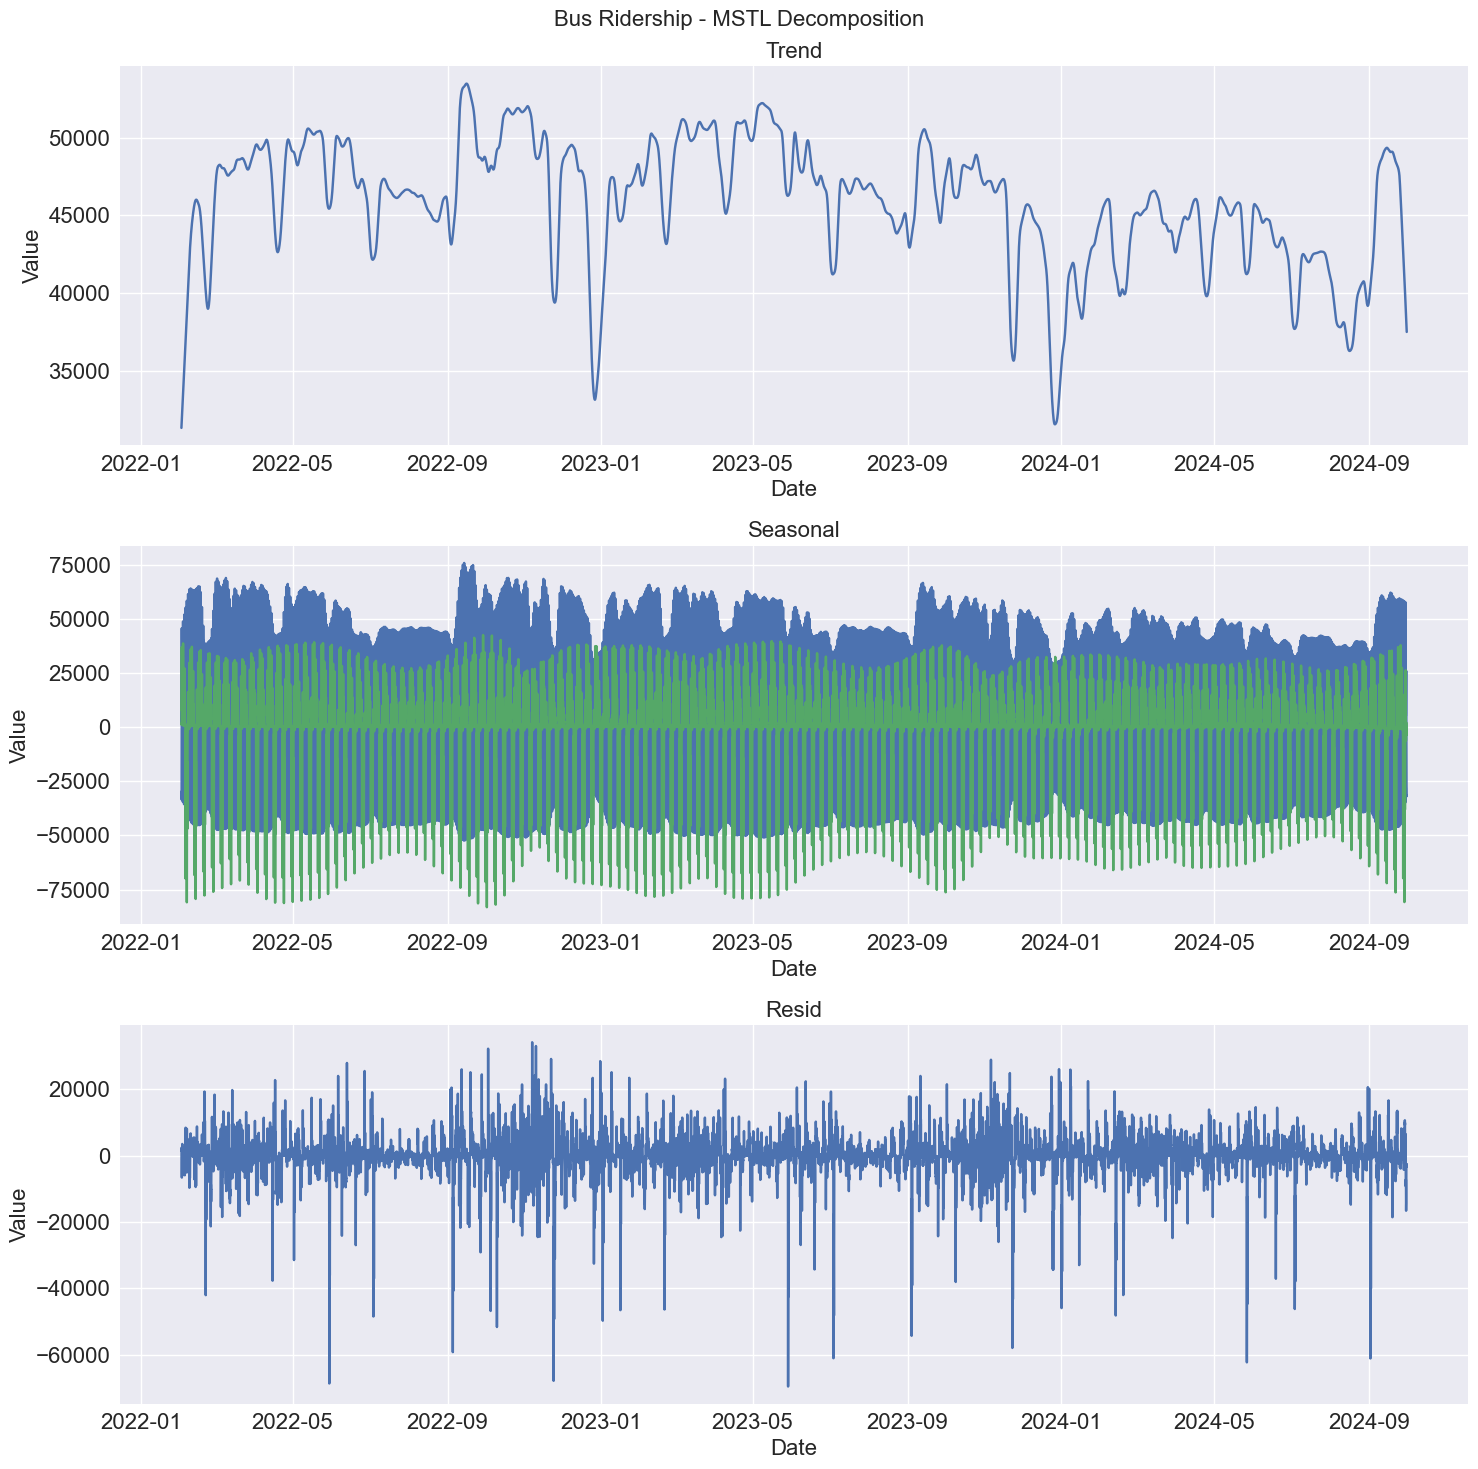

In [8]:
# Import required libraries
from statsmodels.tsa.seasonal import MSTL
import numpy as np

def perform_mstl(data, periods=[7, 365]):
    mstl = MSTL(data, periods=periods).fit()
    return mstl

# Perform MSTL decomposition for subway data
subway_decomposition = perform_mstl(hourly_subway_df['total_ridership'], periods=[24, 24*7])

# Perform MSTL decomposition for bus data
bus_decomposition = perform_mstl(hourly_bus_df['total_ridership'], periods=[24, 24*7])

# Plot the decomposition results
def plot_decomposition(decomposition, title, df):
    fig, axs = plt.subplots(3, 1, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)
    
    components = ['trend', 'seasonal', 'resid']
    
    for i, component in enumerate(components):
        axs[i].plot(df['hour'], getattr(decomposition, component))
        axs[i].set_title(component.capitalize(), fontsize=16)
        axs[i].set_xlabel('Date', fontsize=16)
        axs[i].set_ylabel('Value', fontsize=16)
        axs[i].tick_params(axis='both', which='major', labelsize=16)
        
        if component == 'resid':
            # Find the 20 biggest outliers
            residuals = getattr(decomposition, component)
            outliers = np.abs(residuals).nlargest(20)
            
            # Print the times of the outliers
            print(f"\n20 biggest outliers for {title}:")
            for time, value in zip(df['hour'].iloc[outliers.index], outliers):
                print(f"Time: {time}, Residual: {value}")
        
    plt.tight_layout()
    plt.show()

# Plot decomposition for subway data
plot_decomposition(subway_decomposition, 'Subway Ridership - MSTL Decomposition', hourly_subway_df)

# Plot decomposition for bus data
plot_decomposition(bus_decomposition, 'Bus Ridership - MSTL Decomposition', hourly_bus_df)


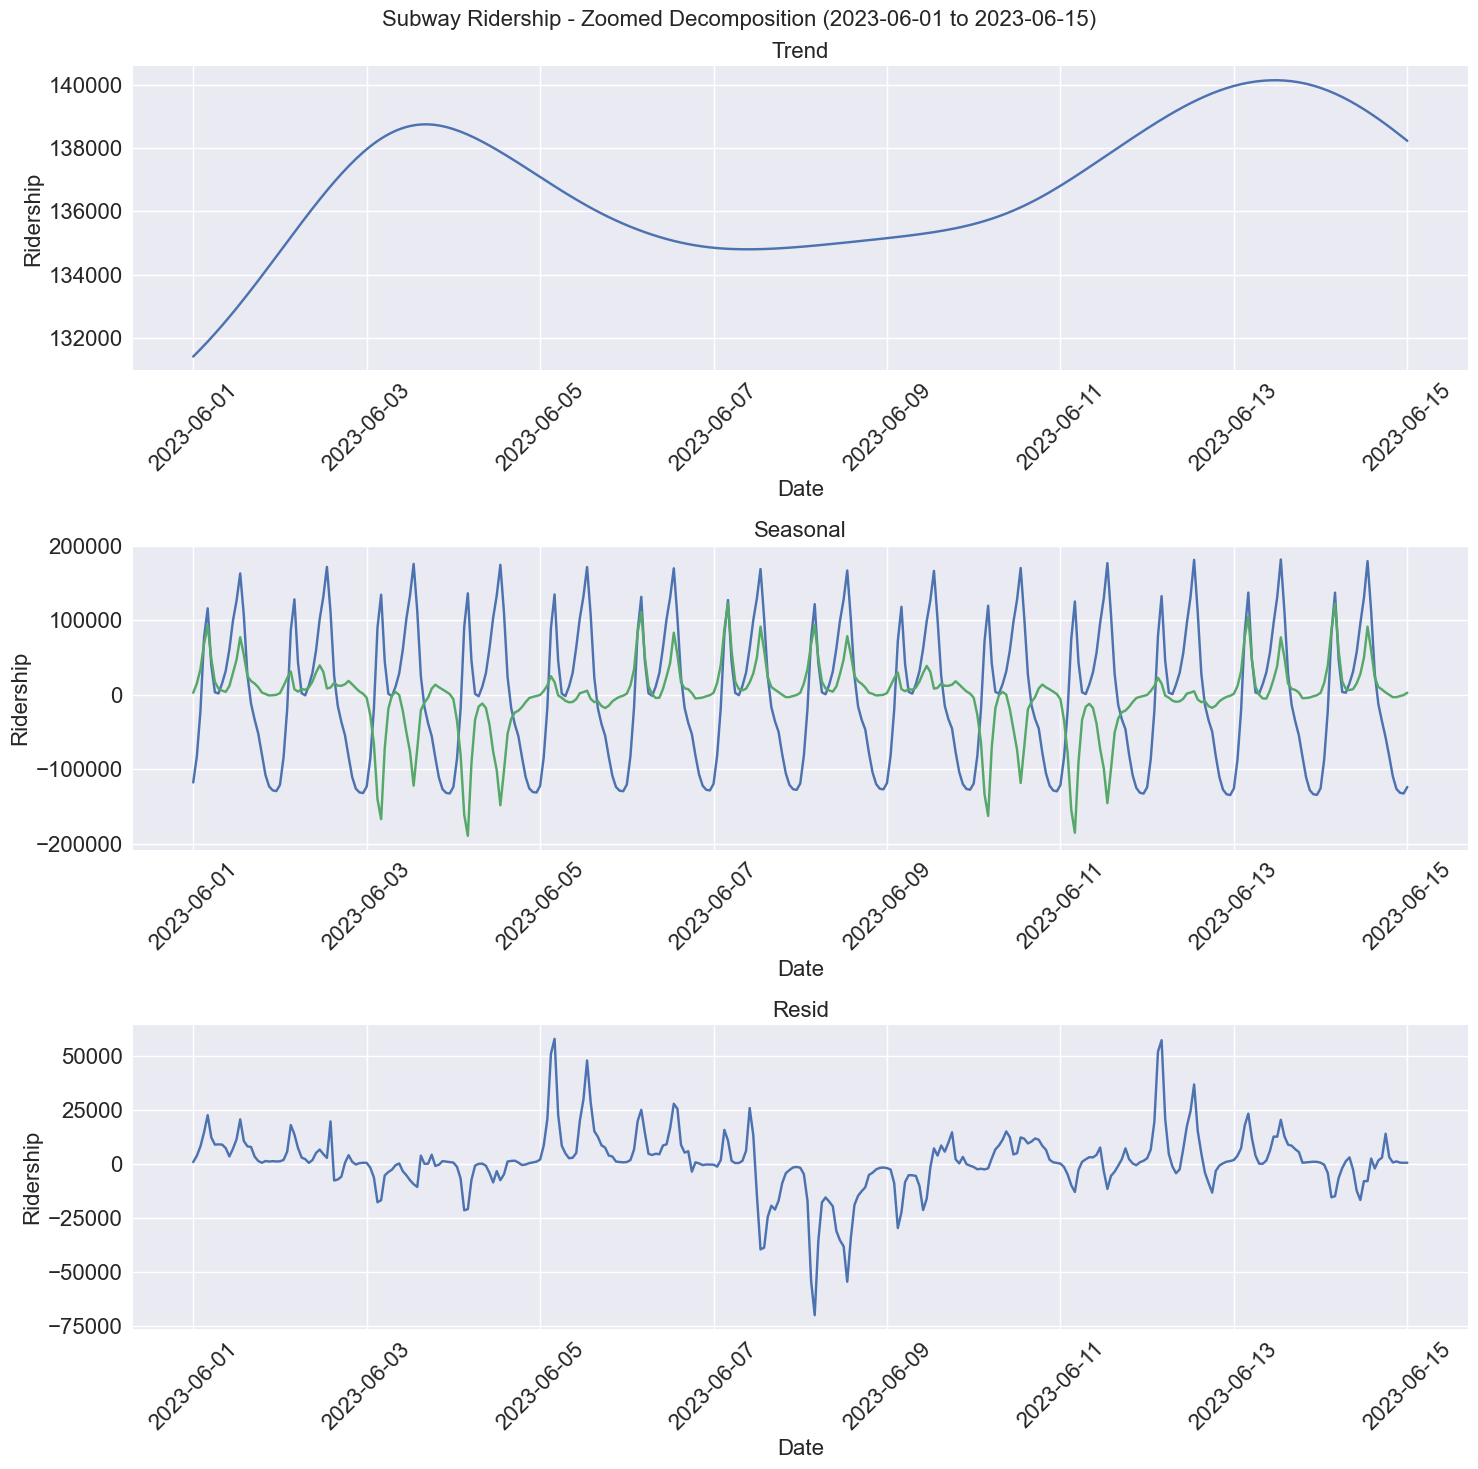

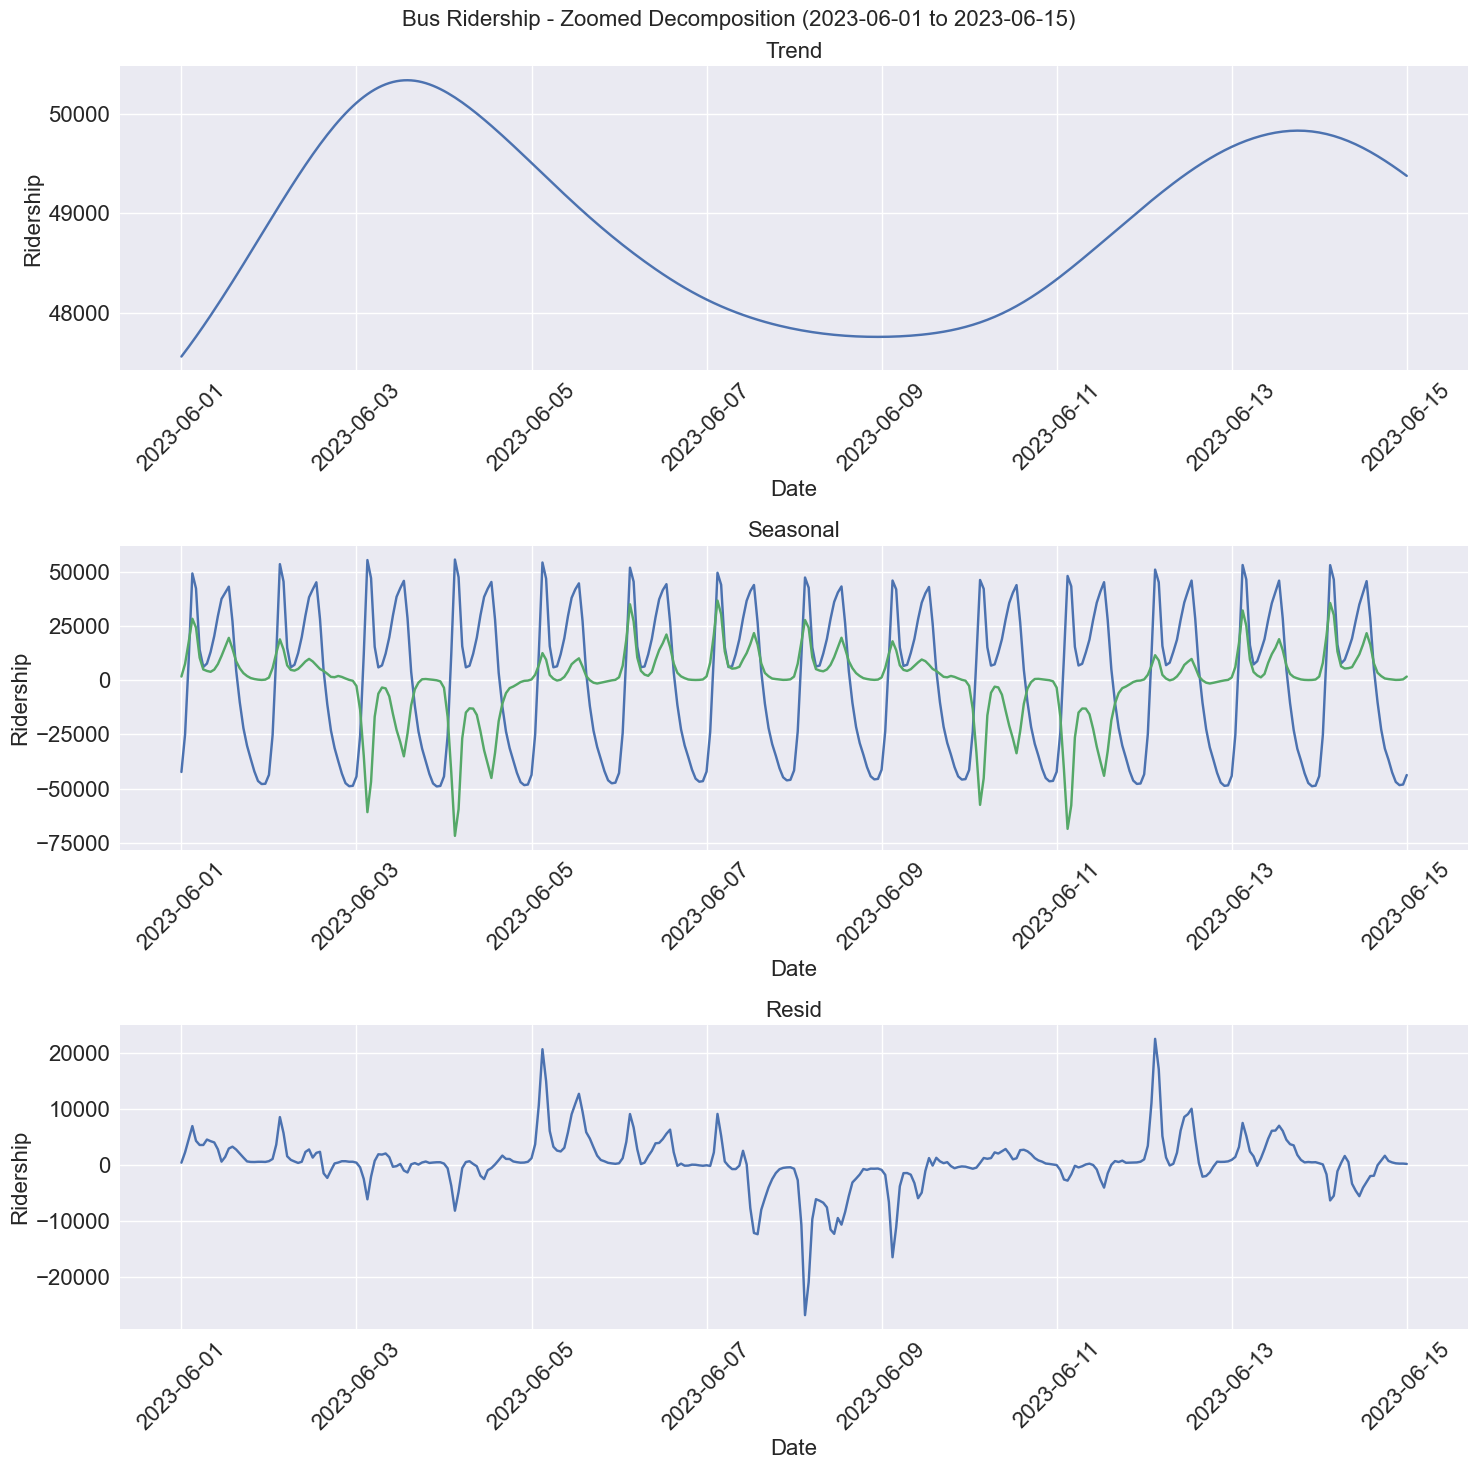

In [9]:
# Zoom in on the trend, seasonality, and residual for bus and subway from June 1 to June 15 in 2023
start_date = '2023-06-01'
end_date = '2023-06-15'

def plot_zoomed_decomposition(decomposition, df, title, start_date, end_date):
    mask = (df['hour'] >= start_date) & (df['hour'] <= end_date)
    zoomed_df = df[mask]
    
    fig, axs = plt.subplots(3, 1, figsize=(15, 15))
    fig.suptitle(f'{title} - Zoomed Decomposition ({start_date} to {end_date})', fontsize=16)
    
    components = ['trend', 'seasonal', 'resid']
    
    for i, component in enumerate(components):
        axs[i].plot(zoomed_df['hour'], getattr(decomposition, component)[mask])
        axs[i].set_title(component.capitalize(), fontsize=16)
        axs[i].set_xlabel('Date', fontsize=16)
        axs[i].set_ylabel('Ridership', fontsize=16)
        
        # Rotate x-axis labels for better readability
        axs[i].tick_params(axis='x', rotation=45, labelsize=16)
        axs[i].tick_params(axis='y', labelsize=16)
        
    plt.tight_layout()
    plt.show()

# Plot zoomed decomposition for subway data
plot_zoomed_decomposition(subway_decomposition, hourly_subway_df, 'Subway Ridership', start_date, end_date)

# Plot zoomed decomposition for bus data
plot_zoomed_decomposition(bus_decomposition, hourly_bus_df, 'Bus Ridership', start_date, end_date)


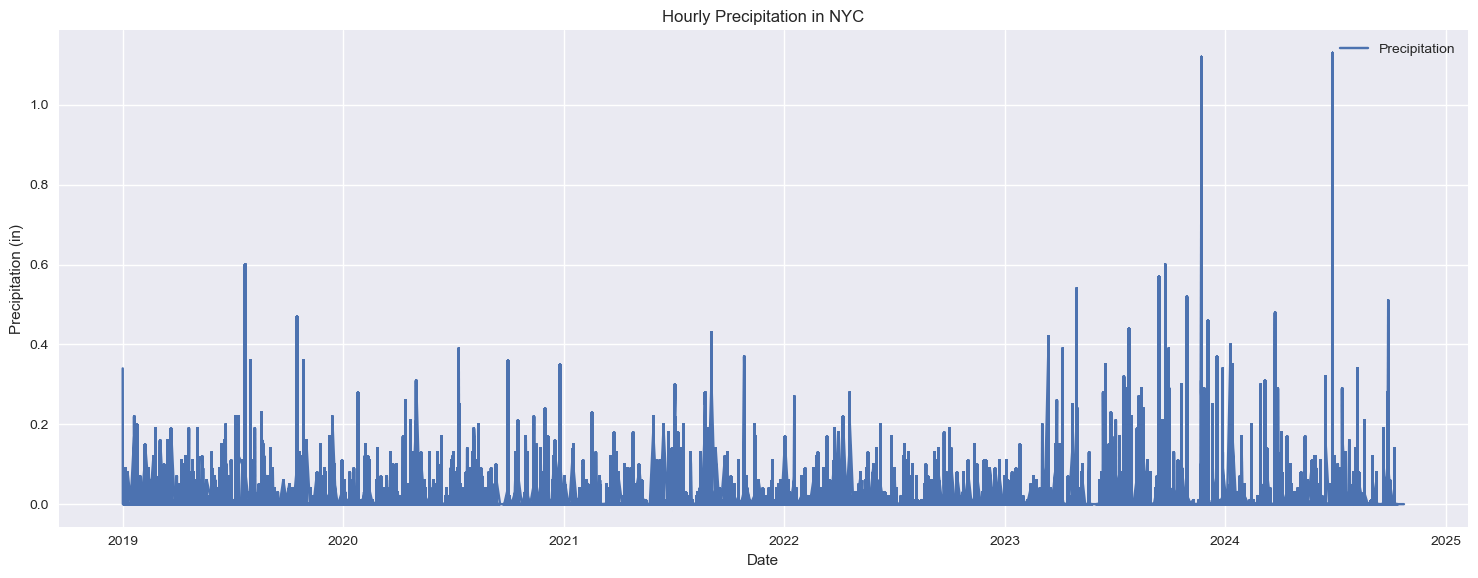

Weather data starts from: 2019-01-01 00:00:00
Number of hours in weather data: 355992
Number of hours in subway data after cutoff: 37261
Number of hours in bus data after cutoff: 23325

Updated Weather DataFrame:
                 time  temp_c  humidity  wind_kph  heat_index  wind_chill  \
0 2019-01-01 00:00:00     9.9        96      15.5       40.88    7.730417   
1 2019-01-01 01:00:00    10.5        95      15.6       41.15    8.460662   
2 2019-01-01 02:00:00    11.2        93      15.7       41.19    9.315478   
3 2019-01-01 03:00:00    11.8        92      19.9       41.46    9.656106   
4 2019-01-01 04:00:00    12.1        89      21.3       40.77    9.918505   

   discomfort_index  humidity_temperature_index  
0             5.102                       950.4  
1             5.715                       997.5  
2             6.391                      1041.6  
3             7.004                      1085.6  
4             7.193                      1076.9  


In [10]:
# Read in hourly weather data
weather_df = pd.read_csv('../assets/nyc_hourly_weather_2019_1_1.csv')

weather_df['time'] = pd.to_datetime(weather_df['time'])

# Calculate additional features
weather_df['heat_index'] = weather_df['temp_c'] + 0.33 * weather_df['humidity'] - 0.70
weather_df['wind_chill'] = 13.12 + 0.6215 * weather_df['temp_c'] - 11.37 * weather_df['wind_kph']**0.16 + 0.3965 * weather_df['temp_c'] * weather_df['wind_kph']**0.16
weather_df['discomfort_index'] = 0.5 * (weather_df['temp_c'] + 61.0 + ((weather_df['temp_c'] - 68.0) * 1.2) + (weather_df['humidity'] * 0.094))
weather_df['humidity_temperature_index'] = weather_df['humidity'] * weather_df['temp_c']

# Find the earliest datetime in the weather data
earliest_weather_datetime = weather_df['time'].min()

# Cutoff the hourly ridership data before the earliest hour in the weather data
hourly_subway_df = hourly_subway_df[hourly_subway_df['hour'] >= earliest_weather_datetime]
hourly_bus_df = hourly_bus_df[hourly_bus_df['hour'] >= earliest_weather_datetime]

# Plot the precipitation weather data over time
plt.figure(figsize=(15, 6))
plt.plot(weather_df['time'], weather_df['precip_in'], label='Precipitation')
plt.title('Hourly Precipitation in NYC')
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some information about the data
print(f"Weather data starts from: {earliest_weather_datetime}")
print(f"Number of hours in weather data: {len(weather_df)}")
print(f"Number of hours in subway data after cutoff: {len(hourly_subway_df)}")
print(f"Number of hours in bus data after cutoff: {len(hourly_bus_df)}")

# Display the first few rows of the updated weather DataFrame
print("\nUpdated Weather DataFrame:")
print(weather_df[['time', 'temp_c', 'humidity', 'wind_kph', 'heat_index', 'wind_chill', 'discomfort_index', 'humidity_temperature_index']].head())

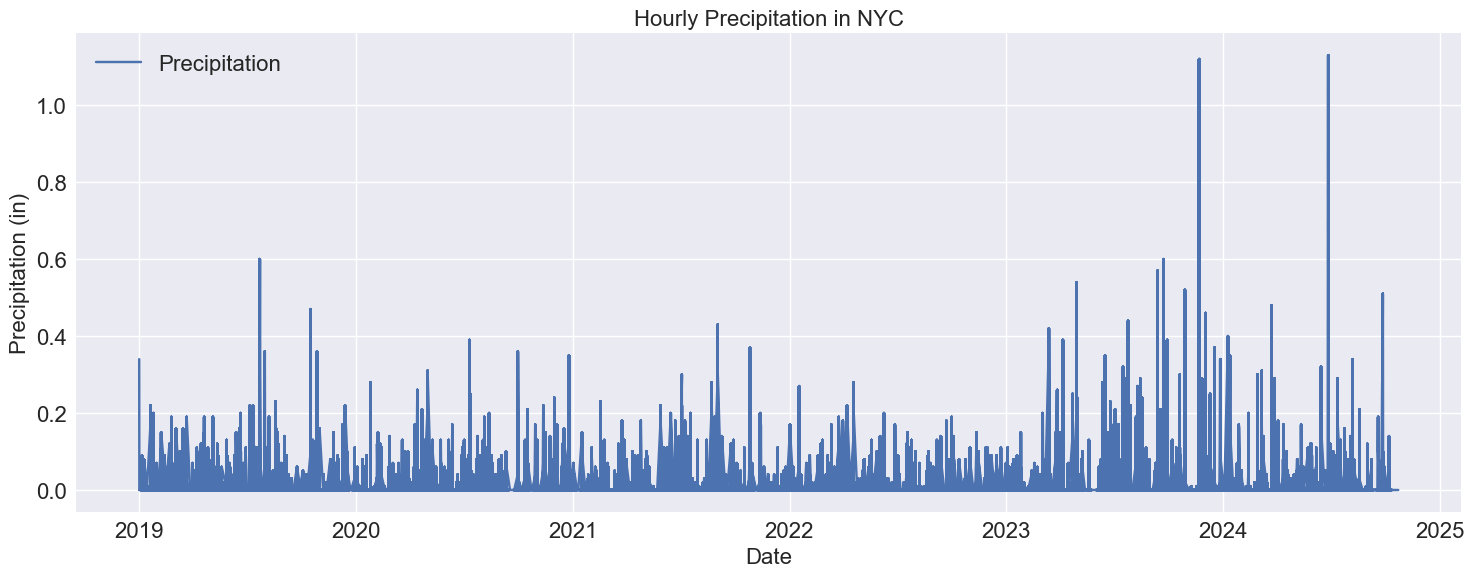


Updated Weather DataFrame:
                 time  Temperature (°F)  Relative Humidity (%)  \
0 2019-01-01 00:00:00              49.8                     96   
1 2019-01-01 01:00:00              51.0                     95   
2 2019-01-01 02:00:00              52.1                     93   
3 2019-01-01 03:00:00              53.2                     92   
4 2019-01-01 04:00:00              53.7                     89   

   Wind Speed (mph)  heat_index  wind_chill  discomfort_index  \
0               9.6       40.88    7.730417             5.102   
1               9.7       41.15    8.460662             5.715   
2               9.8       41.19    9.315478             6.391   
3              12.4       41.46    9.656106             7.004   
4              13.2       40.77    9.918505             7.193   

   humidity_temperature_index  
0                       950.4  
1                       997.5  
2                      1041.6  
3                      1085.6  
4                      1

In [11]:
# Rename columns for clarity
weather_df = weather_df.rename(columns={
    'precip_in': 'Precipitation (in)',
    'pressure_in': 'Pressure (inHg)',
    'cloud': 'Cloud Cover (%)',
    'humidity': 'Relative Humidity (%)',
    'temp_f': 'Temperature (°F)',
    'wind_mph': 'Wind Speed (mph)',
    'gust_mph': 'Wind Gust (mph)',
    'vis_miles': 'Visibility (miles)'
})

# Update the plot with the new column name and set font size to 16
plt.figure(figsize=(15, 6))
plt.plot(weather_df['time'], weather_df['Precipitation (in)'], label='Precipitation')
plt.title('Hourly Precipitation in NYC', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (in)', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# Update the print statement to reflect the new column names
print("\nUpdated Weather DataFrame:")
print(weather_df[['time', 'Temperature (°F)', 'Relative Humidity (%)', 'Wind Speed (mph)', 'heat_index', 'wind_chill', 'discomfort_index', 'humidity_temperature_index']].head())


In [12]:
# Combine ridership data, residuals, and weather data into a single DataFrame
combined_df = pd.merge(
    hourly_subway_df[['hour', 'total_ridership']].rename(columns={'total_ridership': 'subway_ridership'}),
    pd.DataFrame({'hour': hourly_subway_df['hour'], 'subway_residual': subway_decomposition.resid}),
    on='hour'
)

combined_df = pd.merge(
    combined_df,
    hourly_bus_df[['hour', 'total_ridership']].rename(columns={'total_ridership': 'bus_ridership'}),
    on='hour'
)

combined_df = pd.merge(
    combined_df,
    pd.DataFrame({'hour': hourly_bus_df['hour'], 'bus_residual': bus_decomposition.resid}),
    on='hour'
)

combined_df = pd.merge(
    combined_df,
    weather_df,
    left_on='hour',
    right_on='time'
)

# Drop the redundant 'time' column
combined_df = combined_df.drop('time', axis=1)

# Add a 'season' column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

combined_df['season'] = combined_df['hour'].dt.month.map(get_season)

# Add an 'is_weekend' column
combined_df['is_weekend'] = combined_df['hour'].dt.dayofweek.isin([5, 6]).astype(int)

# Display the first few rows of the combined DataFrame
print("\nCombined DataFrame:")
print(combined_df.head())

# Display basic information about the combined DataFrame
print("\nCombined DataFrame Info:")
print(combined_df.info())


Combined DataFrame:
                 hour  subway_ridership  subway_residual  bus_ridership  \
0 2022-02-01 19:00:00           15880.0       709.520018    4910.510998   
1 2022-02-01 19:00:00           15880.0       709.520018    4910.510998   
2 2022-02-01 19:00:00           15880.0       709.520018    4910.510998   
3 2022-02-01 19:00:00           15880.0       709.520018    4910.510998   
4 2022-02-01 19:00:00           15880.0       709.520018    4910.510998   

   bus_residual        date  temp_c  Temperature (°F)  precip_mm  \
0    1559.07156  2022-02-01    -1.8              28.7        0.0   
1    1559.07156  2022-02-01    -1.8              28.7        0.0   
2    1559.07156  2022-02-01    -1.8              28.7        0.0   
3    1559.07156  2022-02-01    -1.8              28.7        0.0   
4    1559.07156  2022-02-01    -1.8              28.7        0.0   

   Precipitation (in)  ...  gust_kph  Wind Gust (mph)  condition_text  \
0                 0.0  ...      10.1          

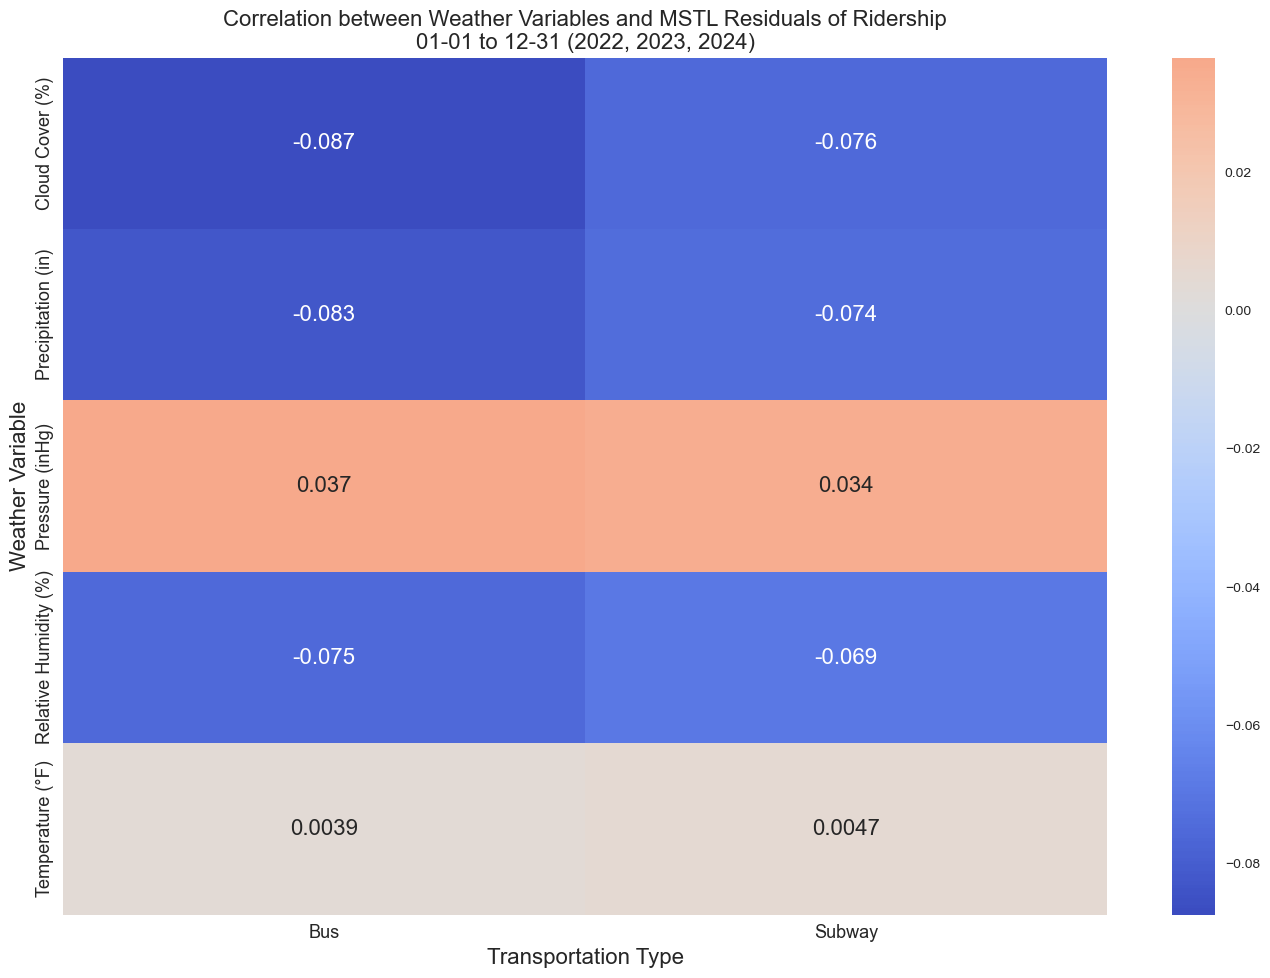

  Transportation Type       Weather Variable  Correlation  Season
0              Subway       Temperature (°F)     0.004680  Winter
1              Subway     Precipitation (in)    -0.073505  Winter
2              Subway  Relative Humidity (%)    -0.069100  Winter
3              Subway        Pressure (inHg)     0.034302  Winter
4              Subway        Cloud Cover (%)    -0.075524  Winter
5                 Bus       Temperature (°F)     0.003896  Winter
6                 Bus     Precipitation (in)    -0.082617  Winter
7                 Bus  Relative Humidity (%)    -0.075247  Winter
8                 Bus        Pressure (inHg)     0.036540  Winter
9                 Bus        Cloud Cover (%)    -0.087324  Winter


In [13]:
def analyze_weather_impact(combined_df, lag=0, start_date=None, end_date=None, hour_range=None, is_weekend=None, plot=False):
    # Shift weather data by the specified lag
    combined_df_lagged = combined_df.copy()
    combined_df_lagged['hour'] = combined_df_lagged['hour'] + pd.Timedelta(hours=lag)

    # Filter data for the specified date range
    if start_date and end_date:
        start_month, start_day = map(int, start_date.split('-'))
        end_month, end_day = map(int, end_date.split('-'))
        
        def is_date_in_range(date):
            month, day = date.month, date.day
            if start_month <= end_month:
                return (start_month, start_day) <= (month, day) <= (end_month, end_day)
            else:
                return (month, day) >= (start_month, start_day) or (month, day) <= (end_month, end_day)
        
        combined_df_lagged = combined_df_lagged[combined_df_lagged['hour'].apply(is_date_in_range)]

    # Filter data for the specified hour range
    if hour_range:
        if isinstance(hour_range, int):
            combined_df_lagged = combined_df_lagged[combined_df_lagged['hour'].dt.hour == hour_range]
        elif isinstance(hour_range, tuple) and len(hour_range) == 2:
            start_hour, end_hour = hour_range
            combined_df_lagged = combined_df_lagged[(combined_df_lagged['hour'].dt.hour >= start_hour) & (combined_df_lagged['hour'].dt.hour < end_hour)]

    # Filter data for weekday/weekend
    if is_weekend is not None:
        combined_df_lagged = combined_df_lagged[combined_df_lagged['is_weekend'] == is_weekend]

    # List of weather variables to analyze
    weather_vars = ['Temperature (°F)', 'Precipitation (in)', 'Relative Humidity (%)',
                    'Pressure (inHg)', 'Cloud Cover (%)']

    results = []
    for mode in ['subway', 'bus']:
        correlations = combined_df_lagged[weather_vars + [f'{mode}_residual']].corr()[f'{mode}_residual'].drop(f'{mode}_residual')
        for var, corr in correlations.items():
            result = {
                'Transportation Type': mode.capitalize(),
                'Weather Variable': var,
                'Correlation': corr
            }
            
            if is_weekend is not None:
                result['Day Type'] = 'Weekend' if is_weekend else 'Weekday'
            
            if 'season' in combined_df_lagged.columns:
                result['Season'] = combined_df_lagged['season'].iloc[0]
            
            if hour_range:
                result['Hour Segment'] = f'{hour_range[0]:02d}-{hour_range[1]:02d}'
                if 'season' in combined_df_lagged.columns:
                    result['Season_Hour'] = f'{combined_df_lagged["season"].iloc[0]}_{hour_range[0]:02d}-{hour_range[1]:02d}'
            
            results.append(result)

    correlation_df = pd.DataFrame(results)

    # Visualization code 
    if plot:
        plt.figure(figsize=(14, 10))  # Increased figure size
        sns.heatmap(correlation_df.pivot(index='Weather Variable', columns='Transportation Type', values='Correlation'), 
                    annot=True, cmap='coolwarm', center=0, annot_kws={"size": 16})  # Increased annotation size
        title = f'Correlation between Weather Variables and MSTL Residuals of Ridership'
        if start_date and end_date:
            title += f'\n{start_date} to {end_date} (2022, 2023, 2024)'
        if hour_range:
            title += f'\nHour range: {hour_range}'
        if is_weekend is not None:
            title += f'\nDay Type: {"Weekend" if is_weekend else "Weekday"}'
        plt.title(title, fontsize=16)  # Increased title font size
        plt.xlabel('Transportation Type', fontsize=16)  # Increased x-label font size
        plt.ylabel('Weather Variable', fontsize=16)  # Increased y-label font size
        plt.tick_params(axis='both', which='major', labelsize=13)  # Increased tick label size
        plt.tight_layout()
        plt.show()

    return correlation_df

# Example usage:
start_date = '01-01'
end_date = '12-31'
# start_date = '12-01'
# end_date = '02-28'
# hours = (8, 12)
is_weekend = None
hours = None

result_df = analyze_weather_impact(combined_df, lag=0, start_date=start_date, end_date=end_date, 
                                   hour_range=hours, is_weekend=is_weekend, plot=True)

print(result_df)

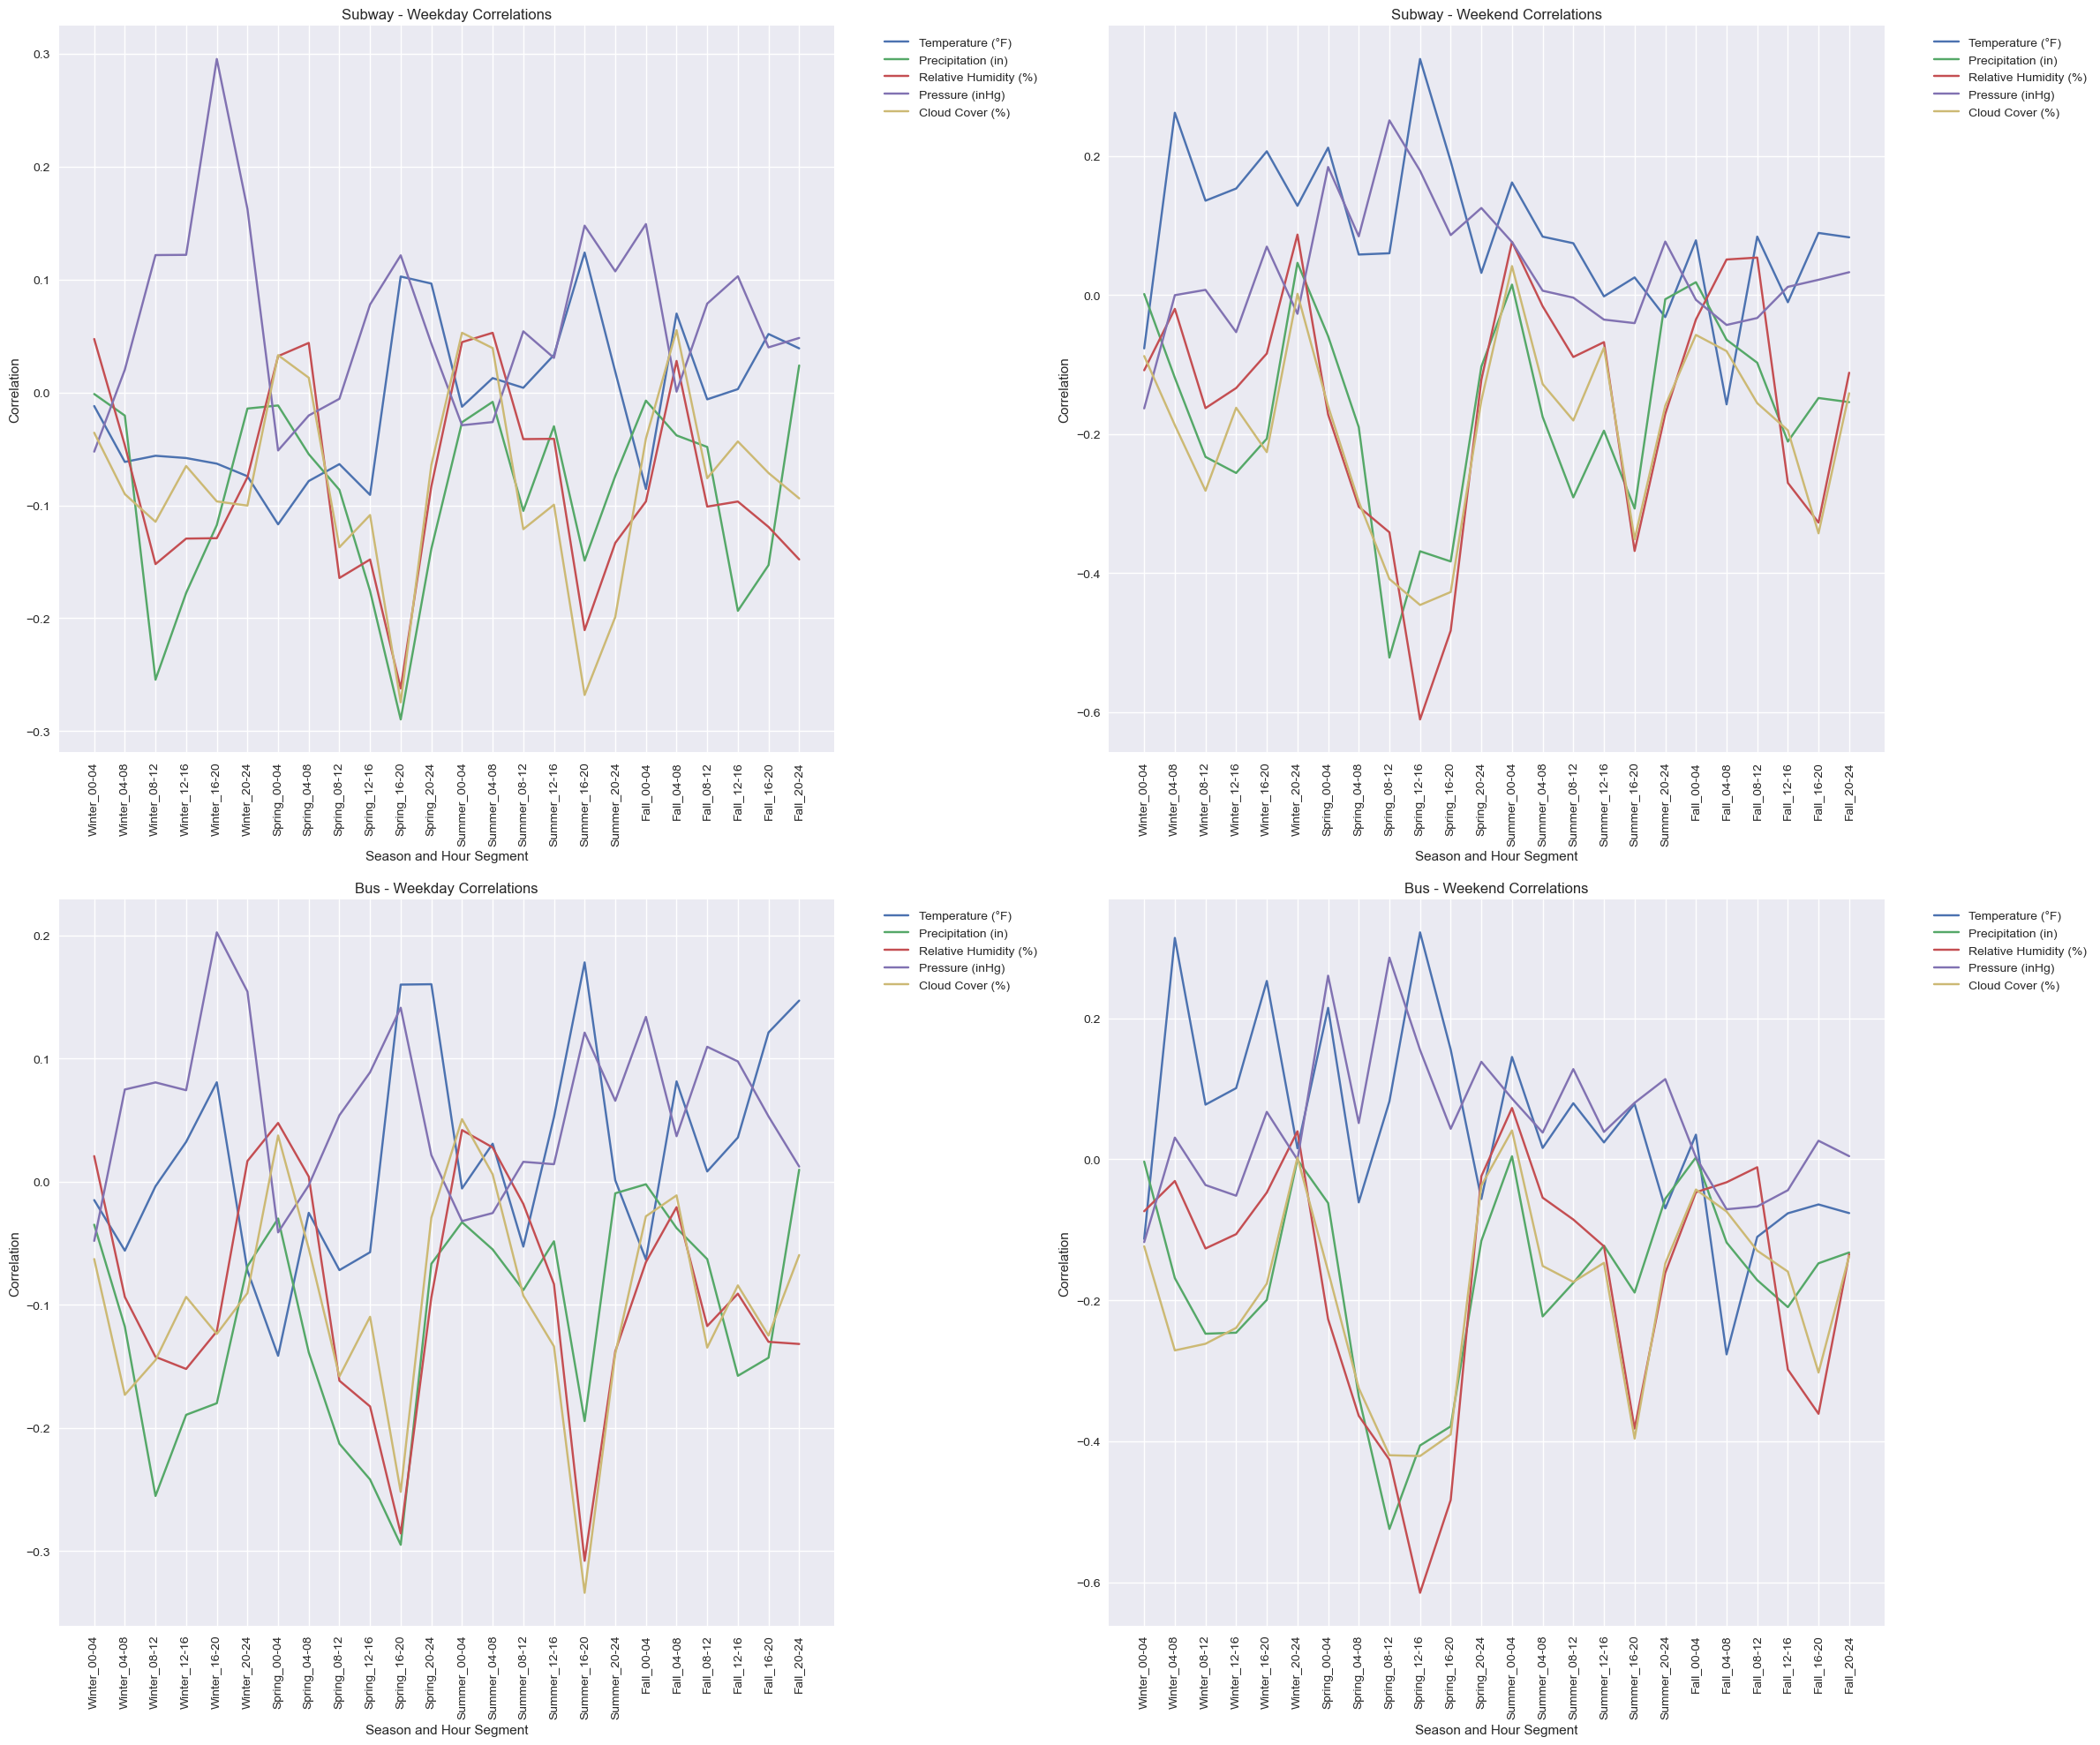

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/696363553.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/696363553.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/696363553.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/696363553.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/696363553.py:79: UserWarning: FixedFormatter should only be used together with Fixe

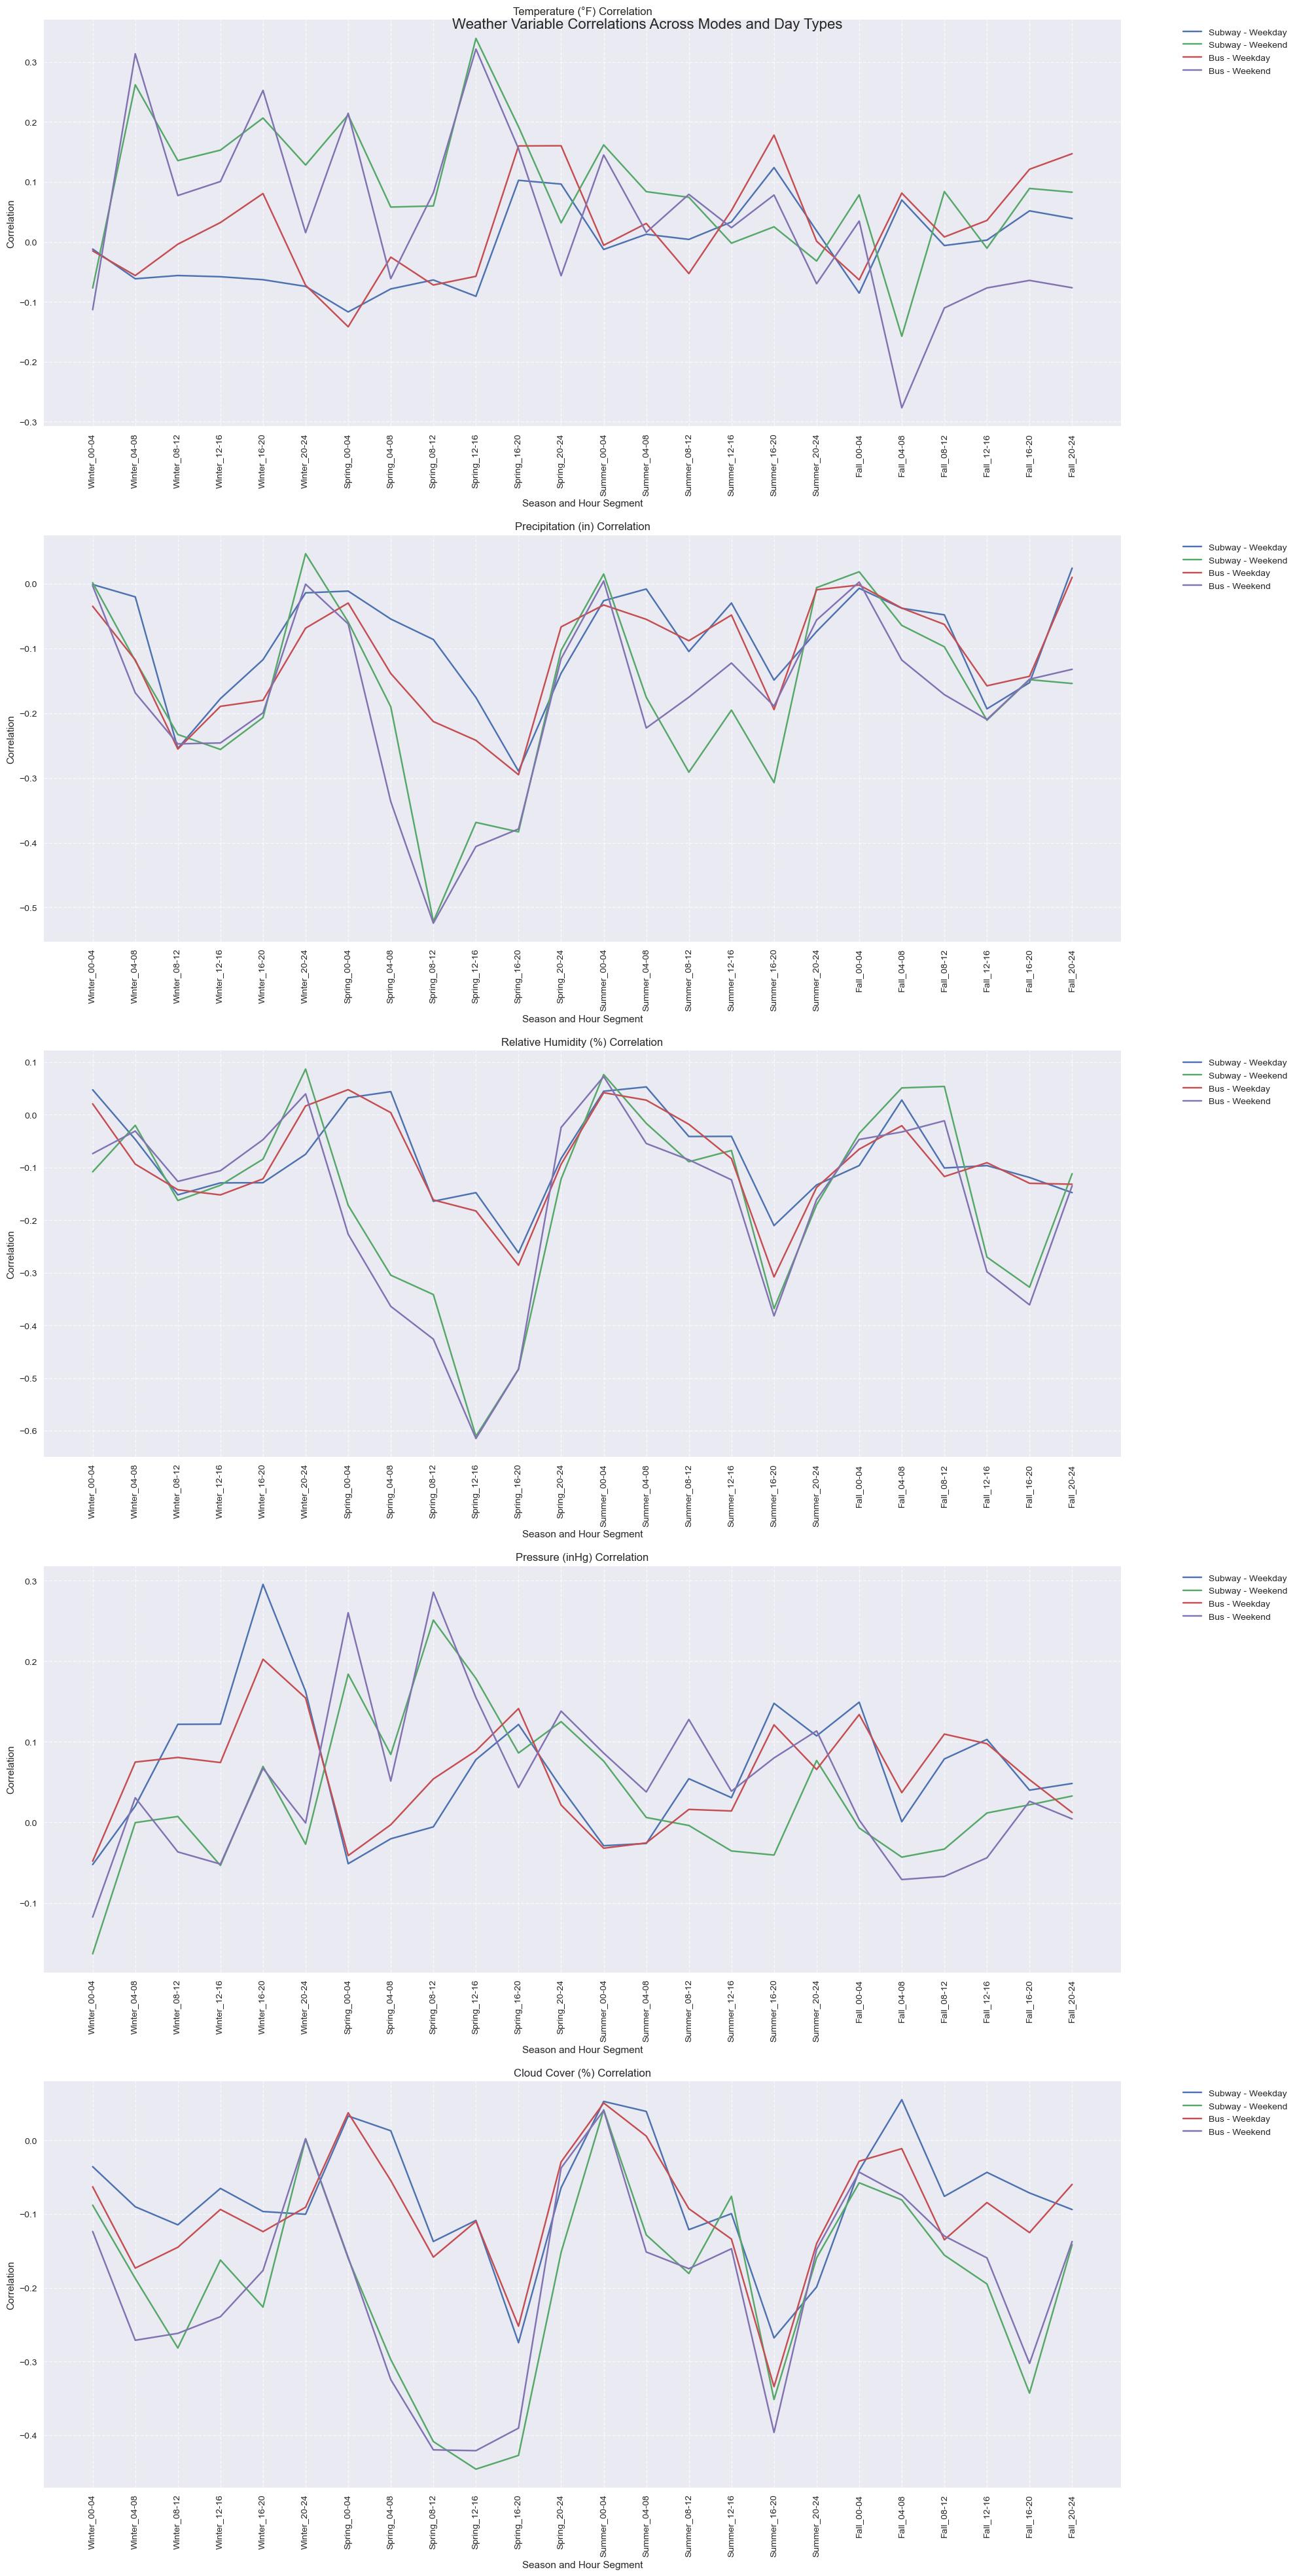

                                                                        count  \
Transportation Type Day Type Season Hour Segment Weather Variable               
Bus                 Weekday  Fall   00-04        Cloud Cover (%)          1.0   
                                                 Precipitation (in)       1.0   
                                                 Pressure (inHg)          1.0   
                                                 Relative Humidity (%)    1.0   
                                                 Temperature (°F)         1.0   
...                                                                       ...   
Subway              Weekend  Winter 20-24        Cloud Cover (%)          1.0   
                                                 Precipitation (in)       1.0   
                                                 Pressure (inHg)          1.0   
                                                 Relative Humidity (%)    1.0   
                            

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_all_conditions(combined_df, lag=0):
    seasons = [('Winter', '12-01', '02-28'), ('Spring', '03-01', '05-31'),
               ('Summer', '06-01', '08-31'), ('Fall', '09-01', '11-30')]
    hour_segments = [(0, 4), (4, 8), (8, 12), (12, 16), (16, 20), (20, 24)]
    # hour_segments = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14), (14, 16), (16, 18), (18, 20), (20, 22), (22, 24)]

    day_types = [('Weekday', False), ('Weekend', True)]

    all_results = []

    for season, start_date, end_date in seasons:
        for start_hour, end_hour in hour_segments:
            for day_type, is_weekend in day_types:
                result_df = analyze_weather_impact(
                    combined_df,
                    lag=lag, start_date=start_date, end_date=end_date,
                    hour_range=(start_hour, end_hour), is_weekend=is_weekend,
                    plot=False
                )
                
                result_df['Season'] = season
                result_df['Hour Segment'] = f'{start_hour:02d}-{end_hour:02d}'
                result_df['Season_Hour'] = f'{season}_{start_hour:02d}-{end_hour:02d}'
                result_df['Day Type'] = day_type
                
                all_results.append(result_df)

    return pd.concat(all_results, ignore_index=True)

# Calculate correlations
correlations_df = analyze_all_conditions(combined_df, lag=0)

# Plotting
plt.figure(figsize=(24, 20))
for mode in ['Subway', 'Bus']:
    for i, day_type in enumerate(['Weekday', 'Weekend']):
        plt.subplot(2, 2, i + 1 if mode == 'Subway' else i + 3)
        data = correlations_df[(correlations_df['Transportation Type'] == mode) & (correlations_df['Day Type'] == day_type)]
        sns.lineplot(data=data, x='Season_Hour', y='Correlation', hue='Weather Variable', 
                     markers=True, dashes=False, errorbar=None)
        plt.title(f'{mode} - {day_type} Correlations')
        plt.xlabel('Season and Hour Segment')
        plt.ylabel('Correlation')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Get unique variables
variables = correlations_df['Weather Variable'].unique()

# Set up the plot
fig, axs = plt.subplots(len(variables), 1, figsize=(20, 8*len(variables)))
fig.suptitle('Weather Variable Correlations Across Modes and Day Types', fontsize=16)

# Plot each variable
for i, variable in enumerate(variables):
    ax = axs[i] if len(variables) > 1 else axs
    
    for mode in ['Subway', 'Bus']:
        for day_type in ['Weekday', 'Weekend']:
            data = correlations_df[(correlations_df['Transportation Type'] == mode) & 
                                   (correlations_df['Day Type'] == day_type) & 
                                   (correlations_df['Weather Variable'] == variable)]
            
            sns.lineplot(data=data, x='Season_Hour', y='Correlation', 
                         label=f'{mode} - {day_type}',
                         markers=True, dashes=False, ax=ax)
    
    ax.set_title(f'{variable} Correlation')
    ax.set_xlabel('Season and Hour Segment')
    ax.set_ylabel('Correlation')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Display summary statistics
print(correlations_df.groupby(['Transportation Type', 'Day Type', 'Season', 'Hour Segment', 'Weather Variable'])['Correlation'].describe())

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


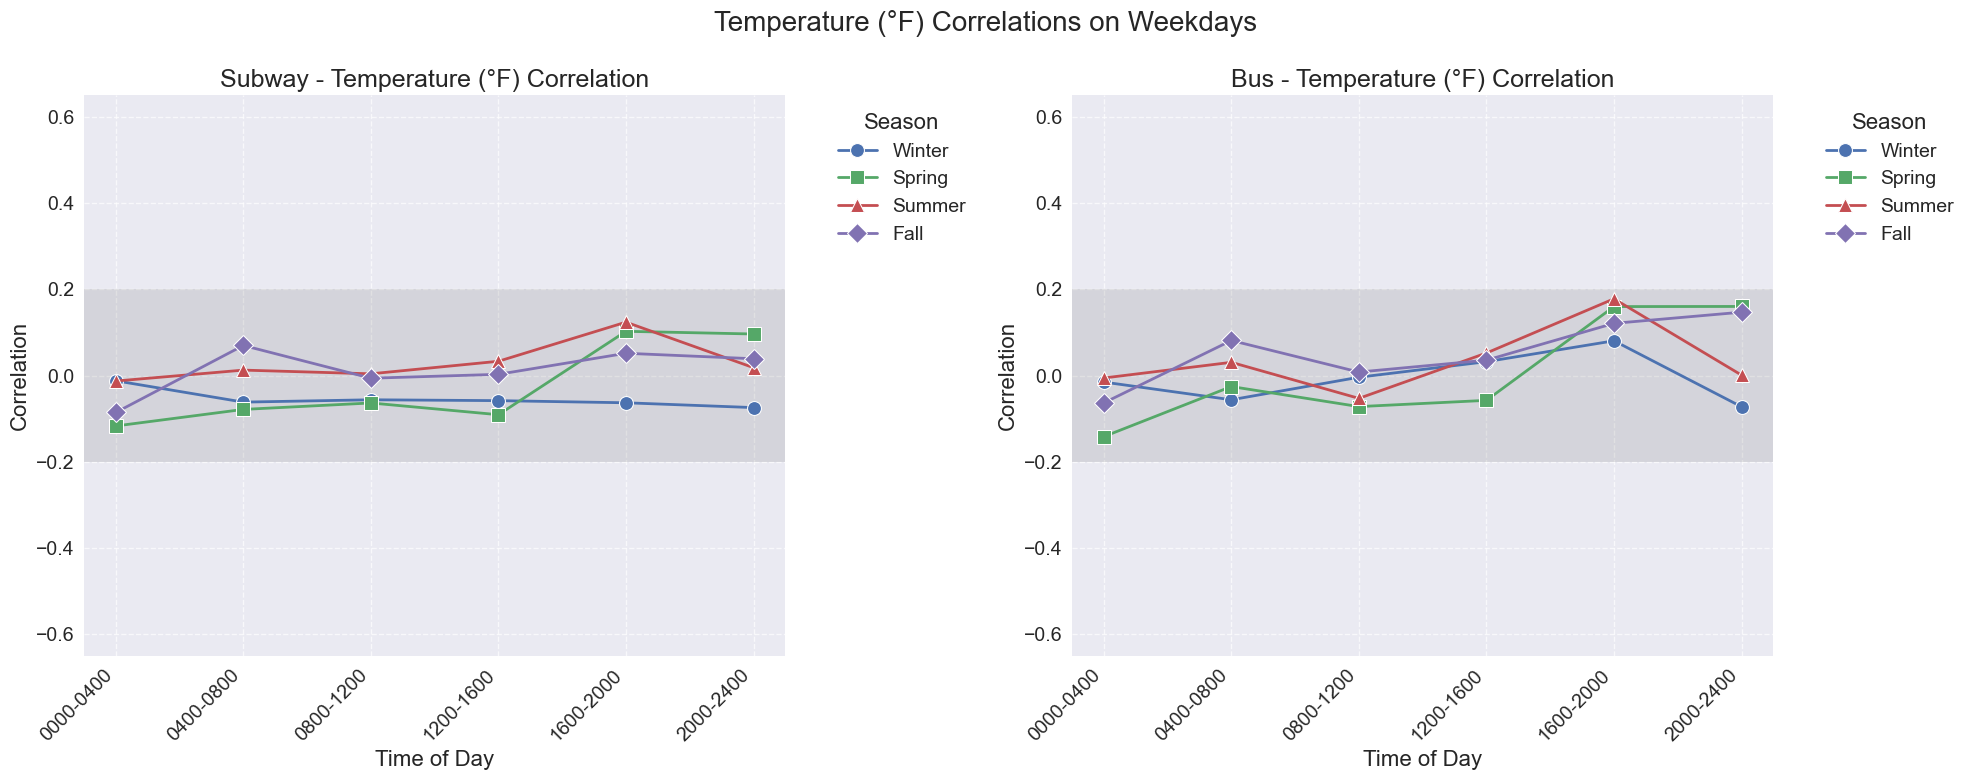

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


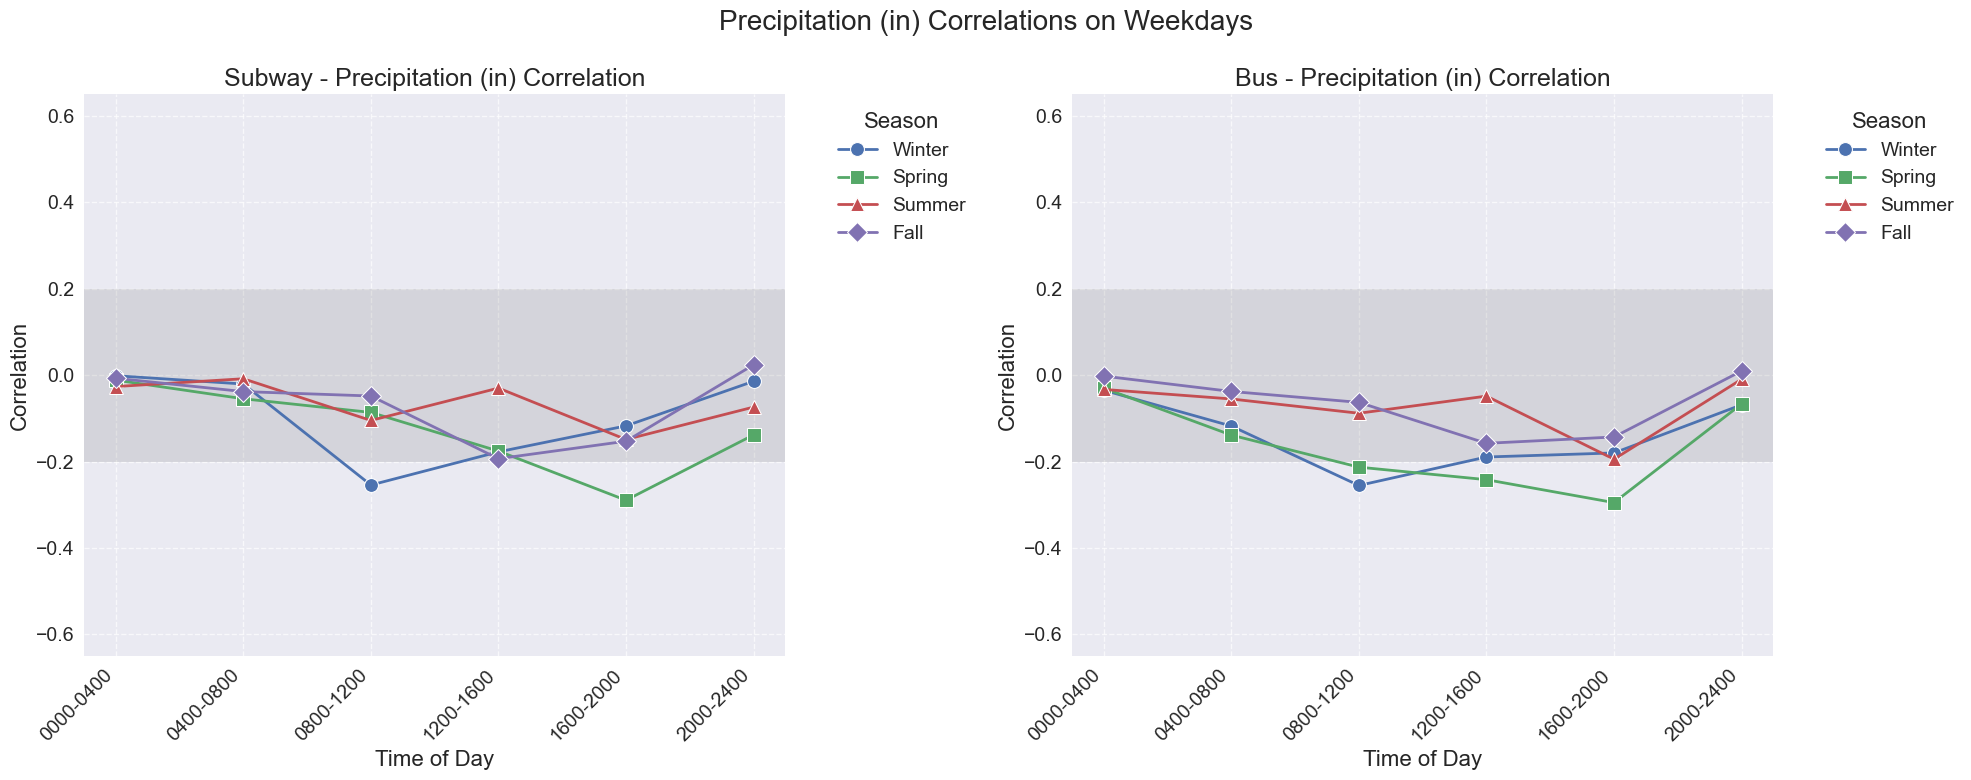

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


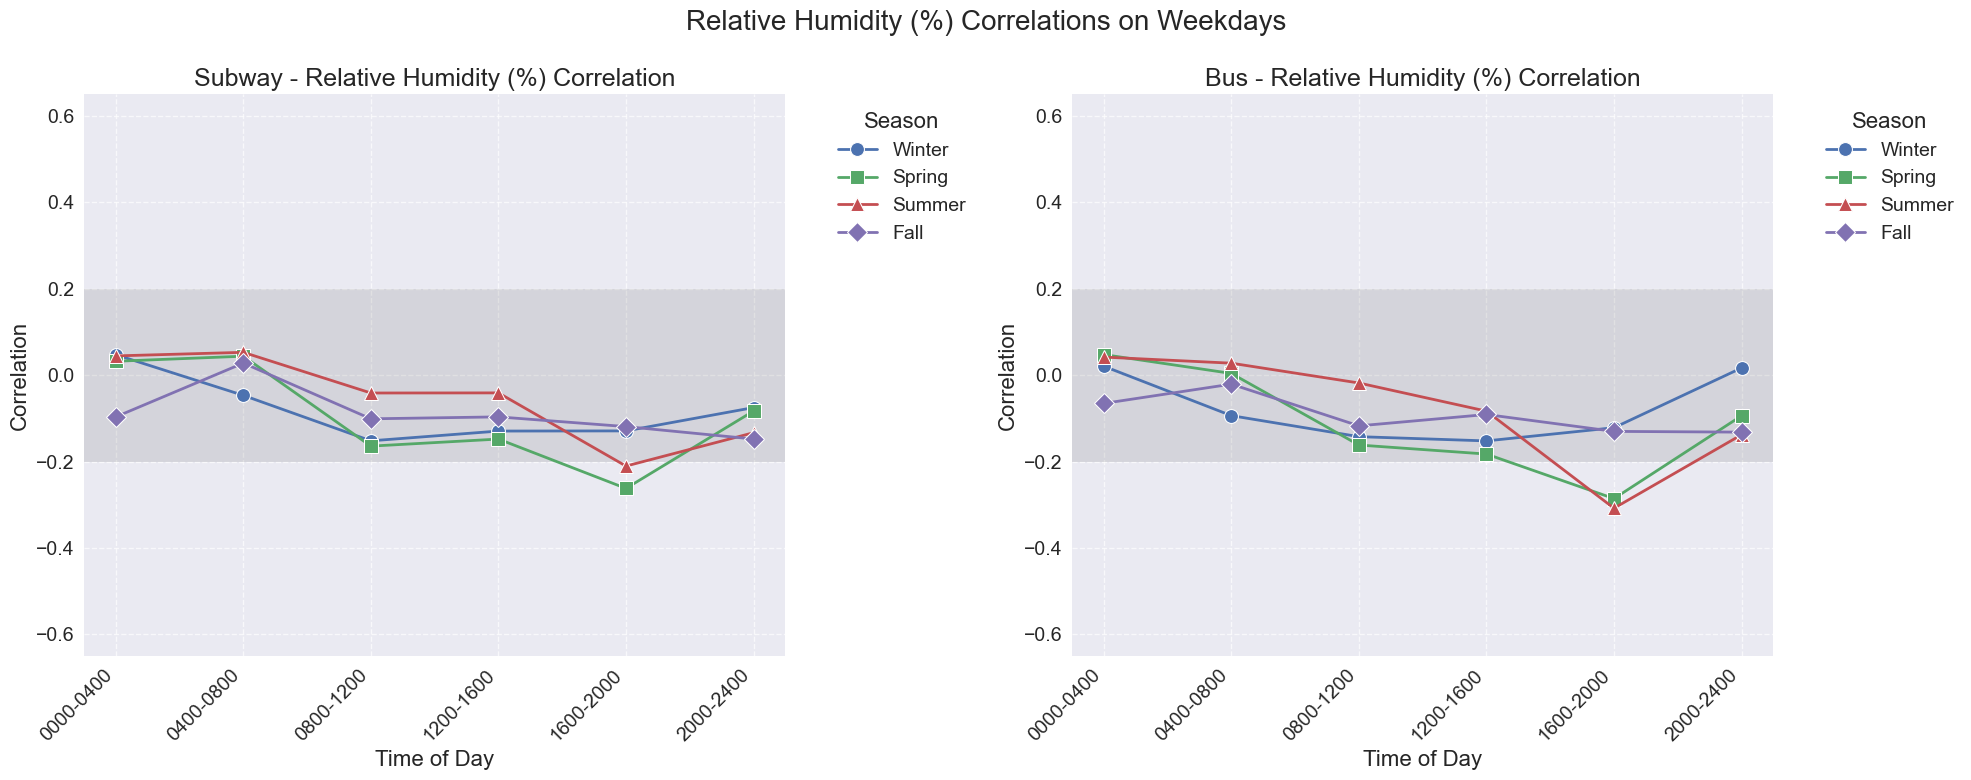

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


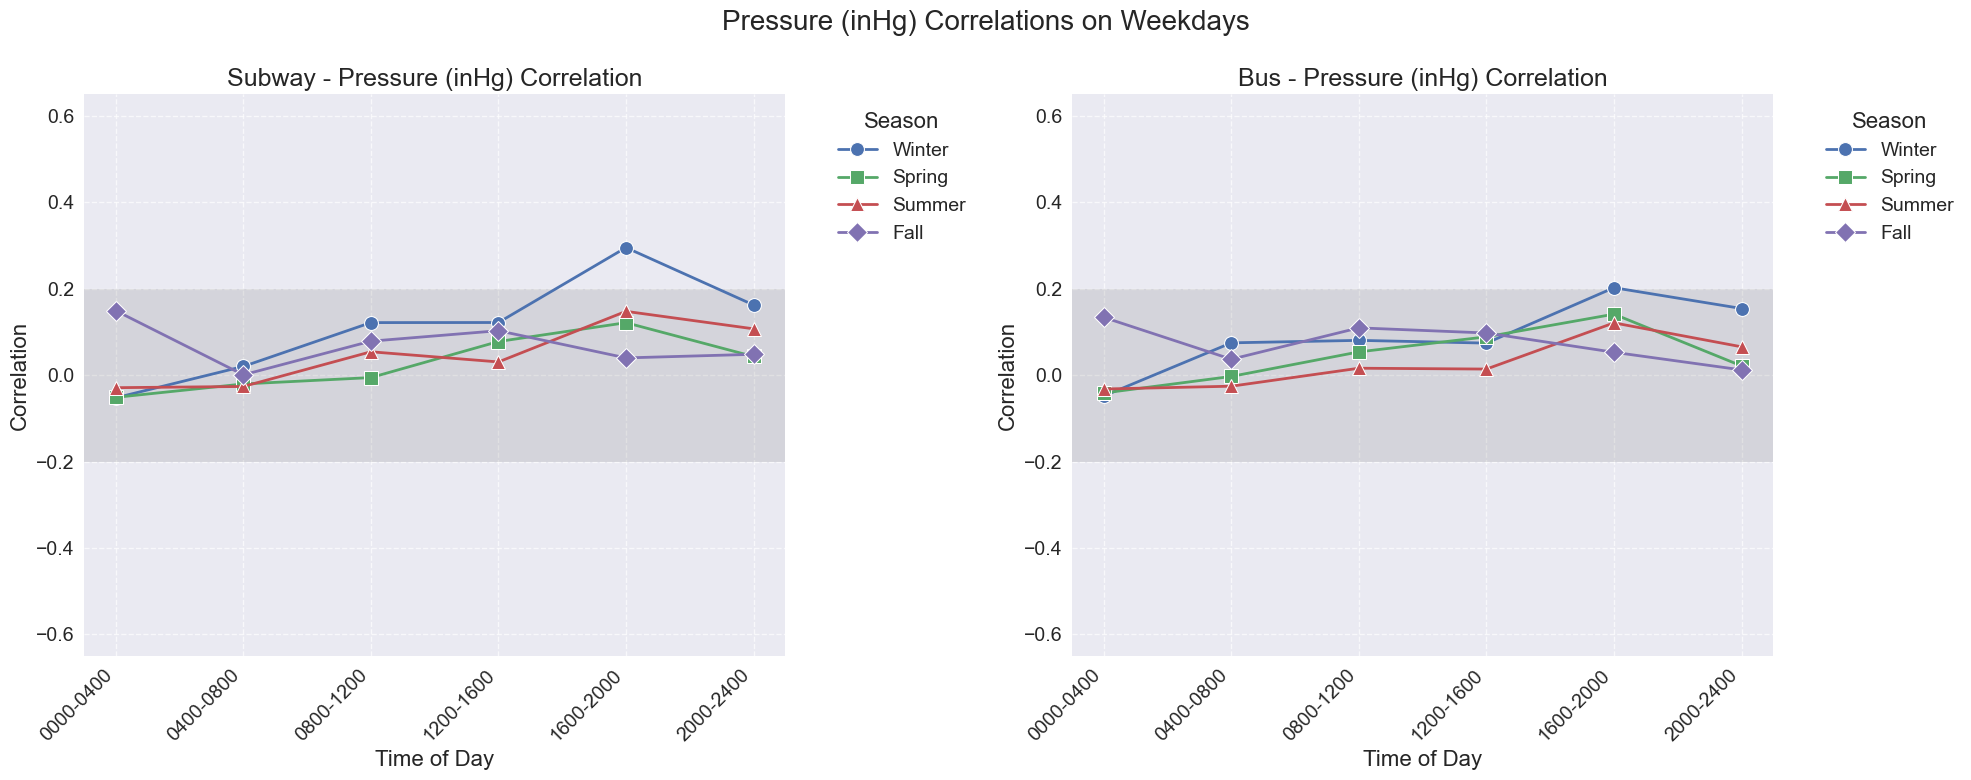

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


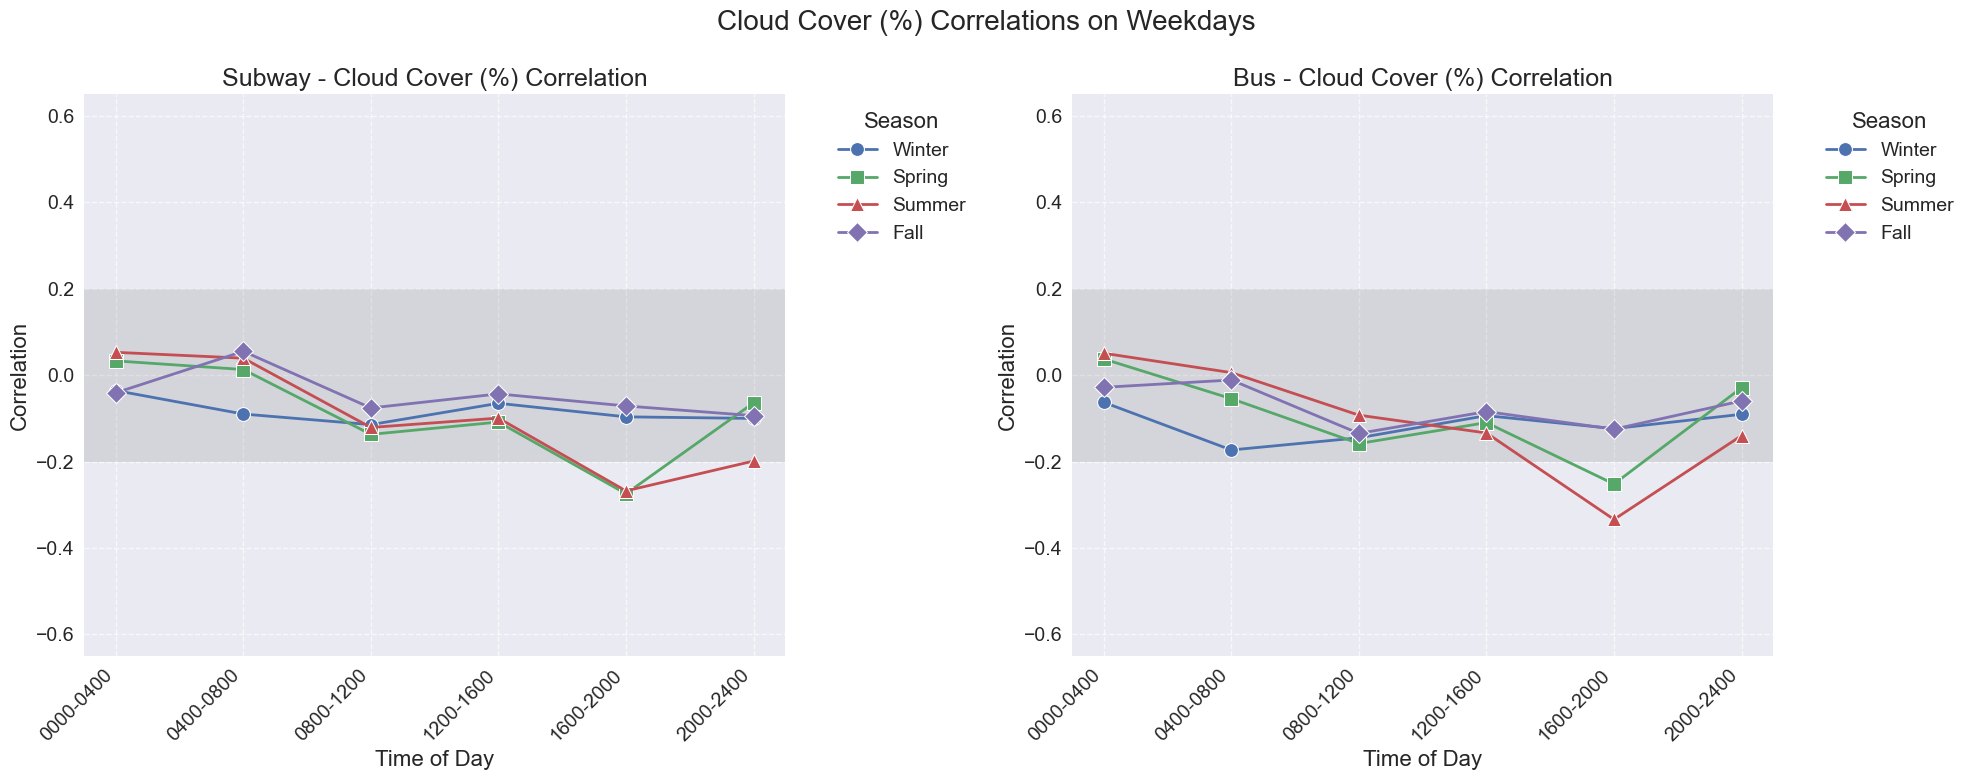

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


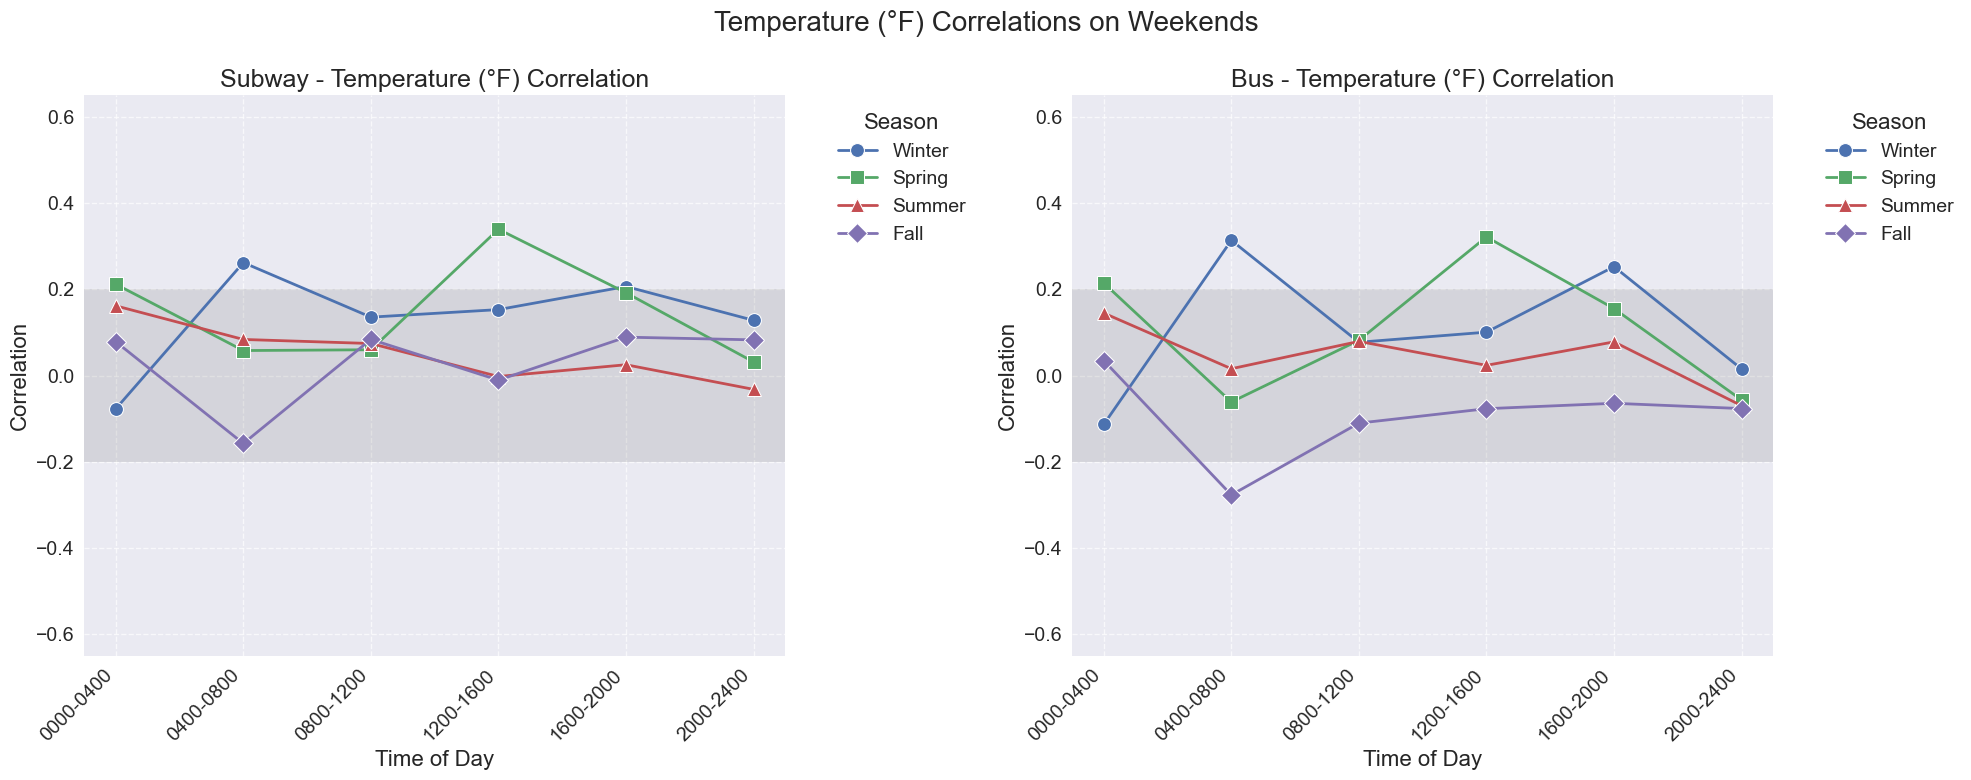

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


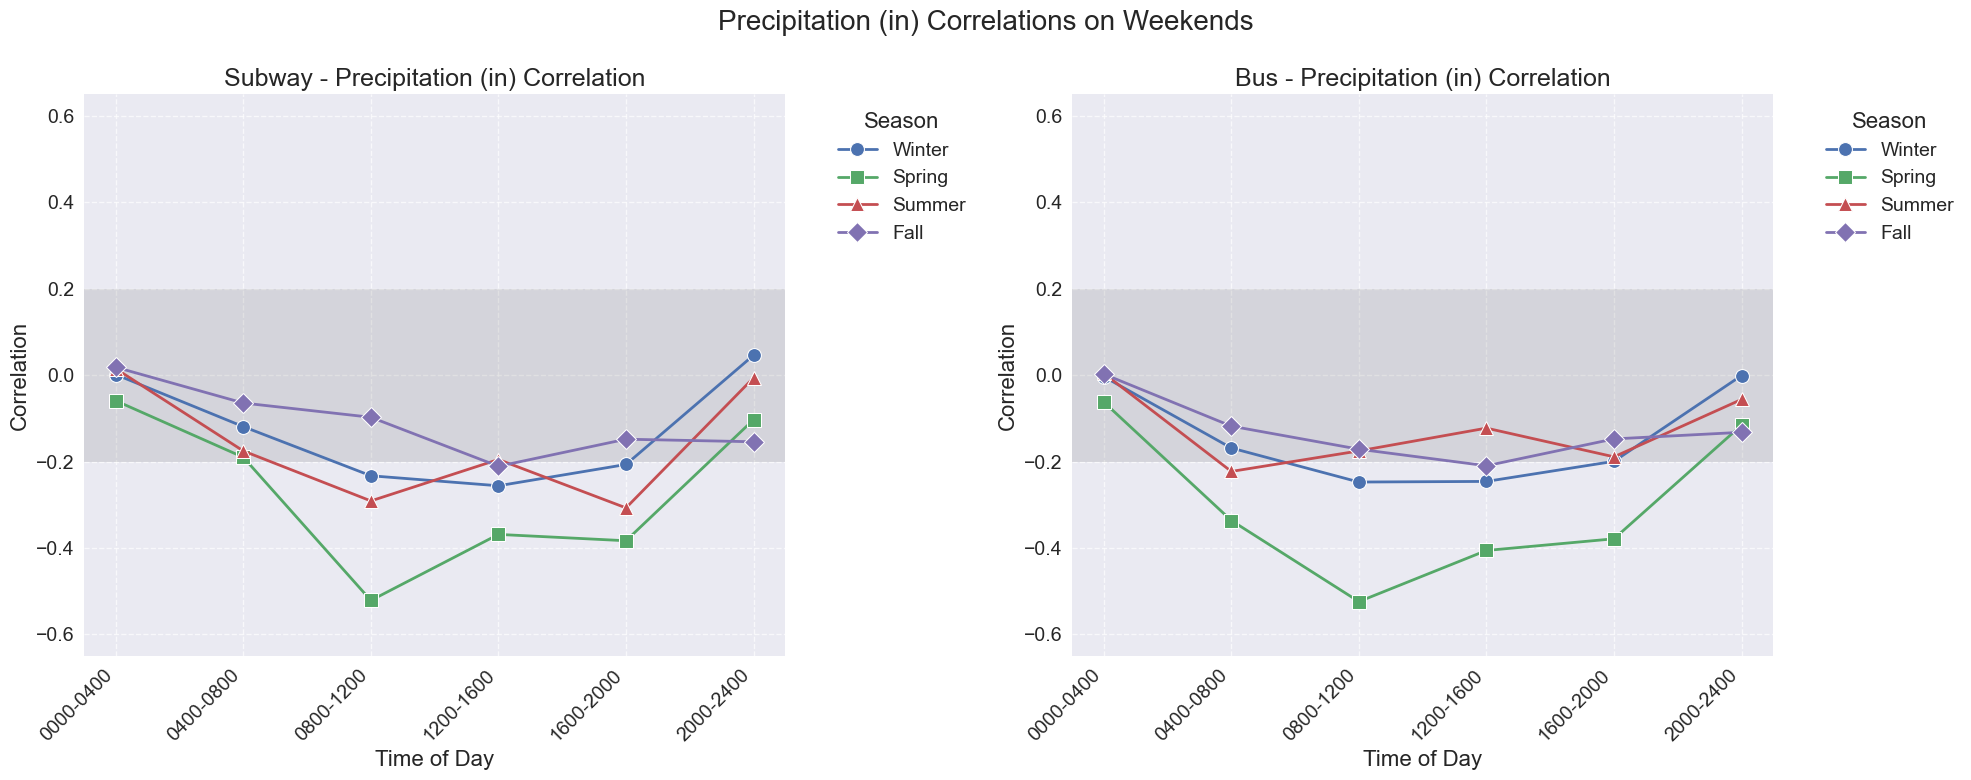

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


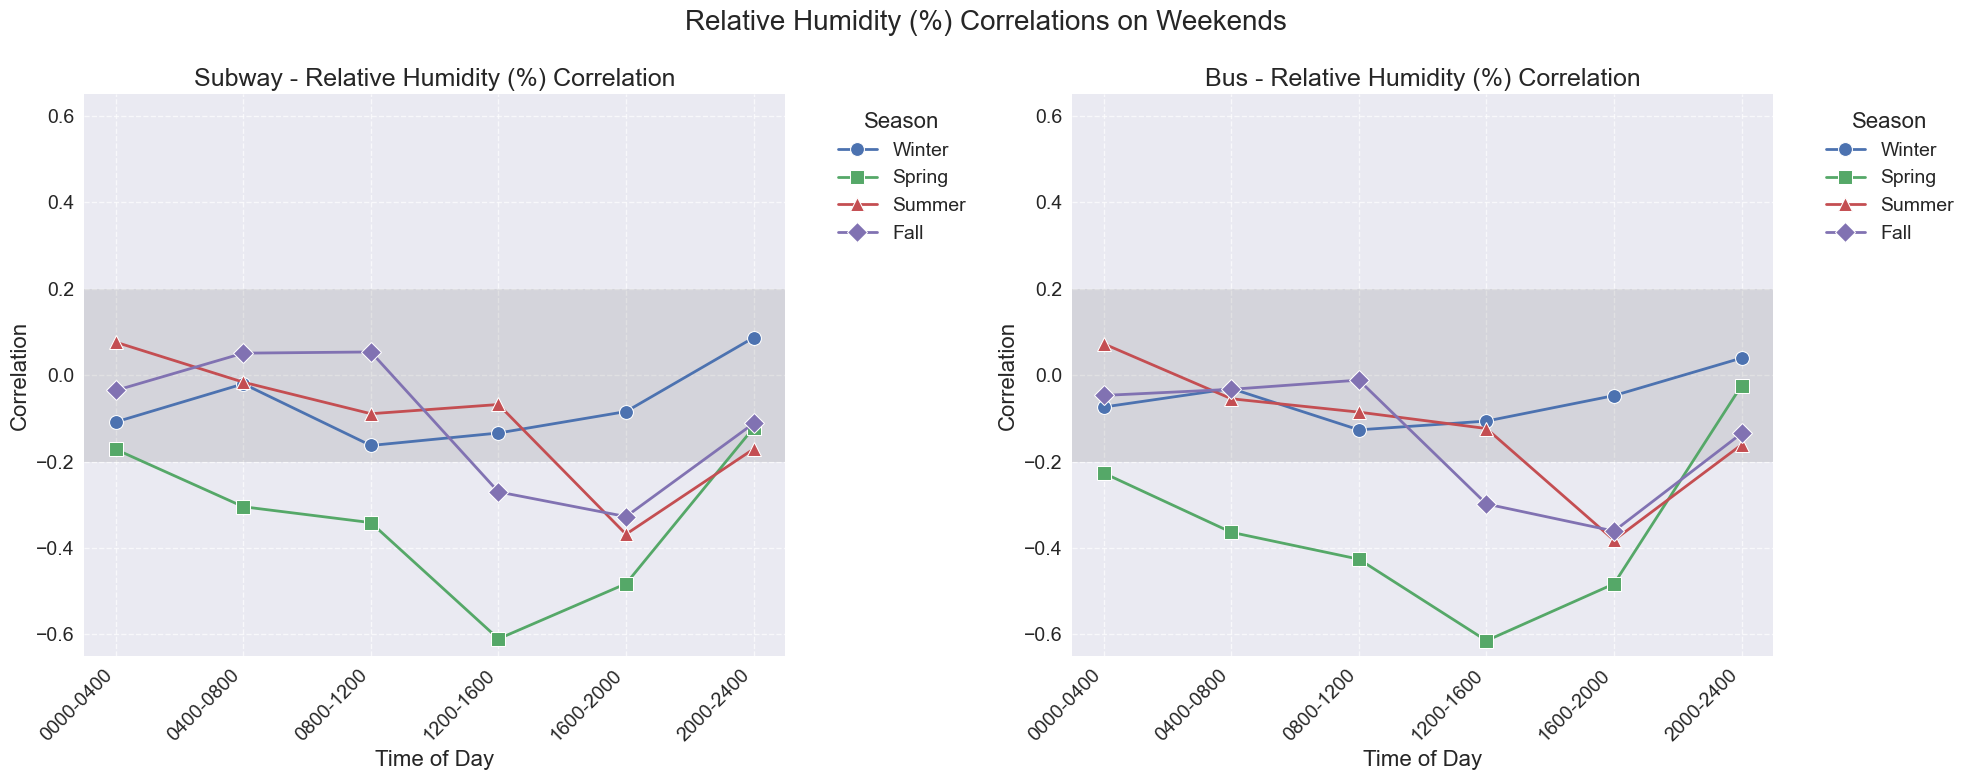

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


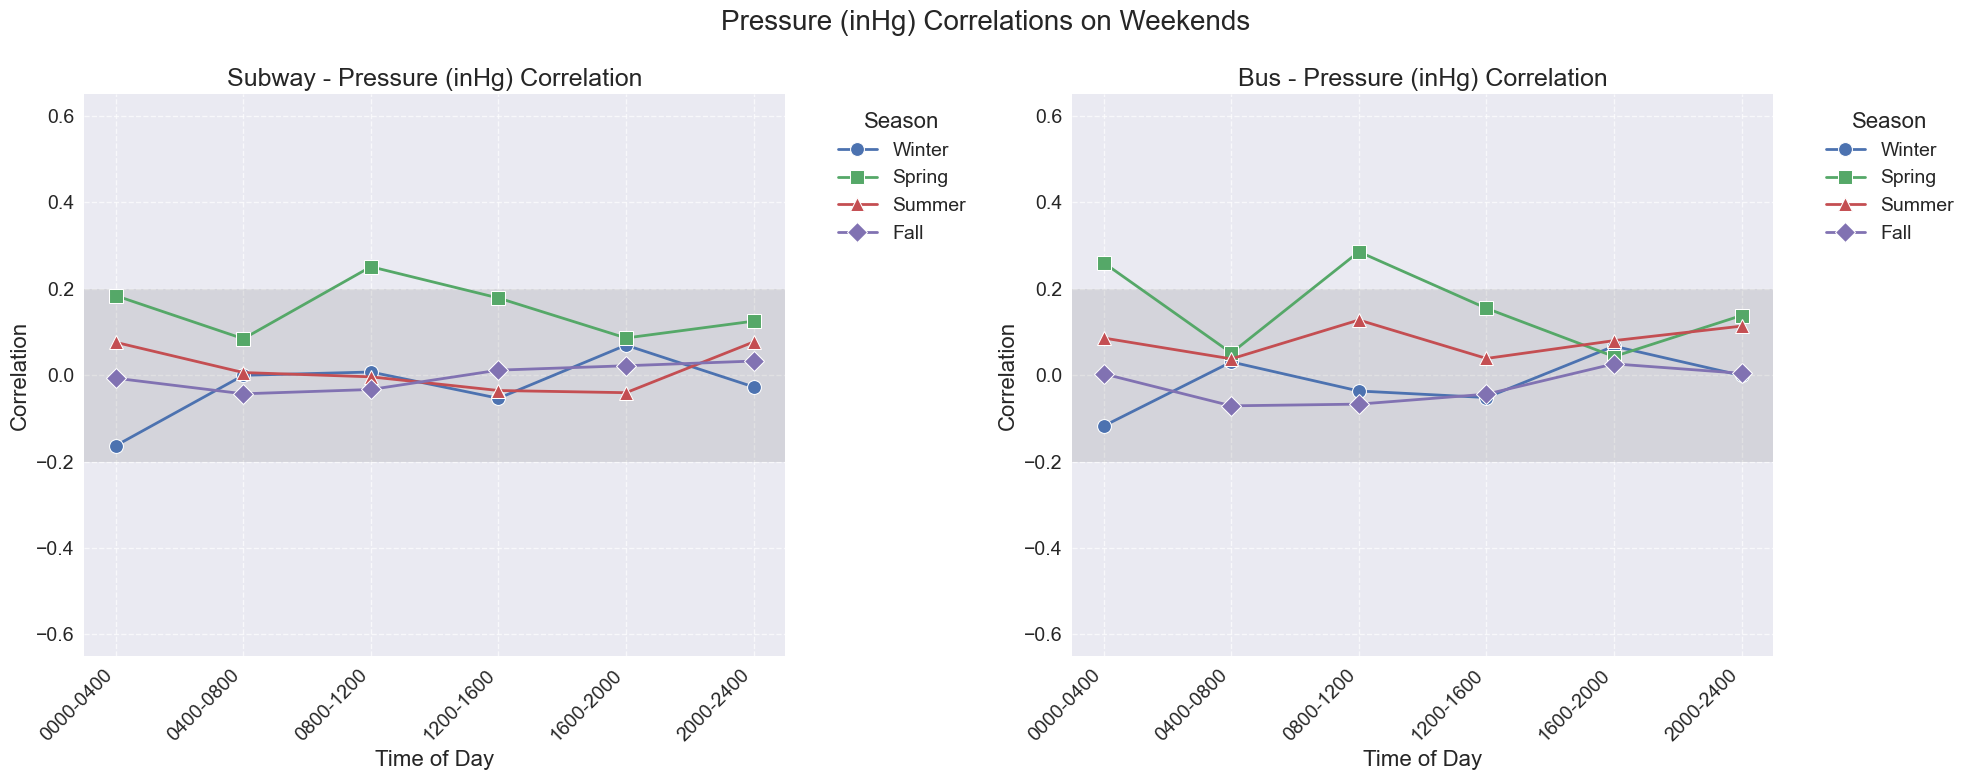

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/407872613.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)


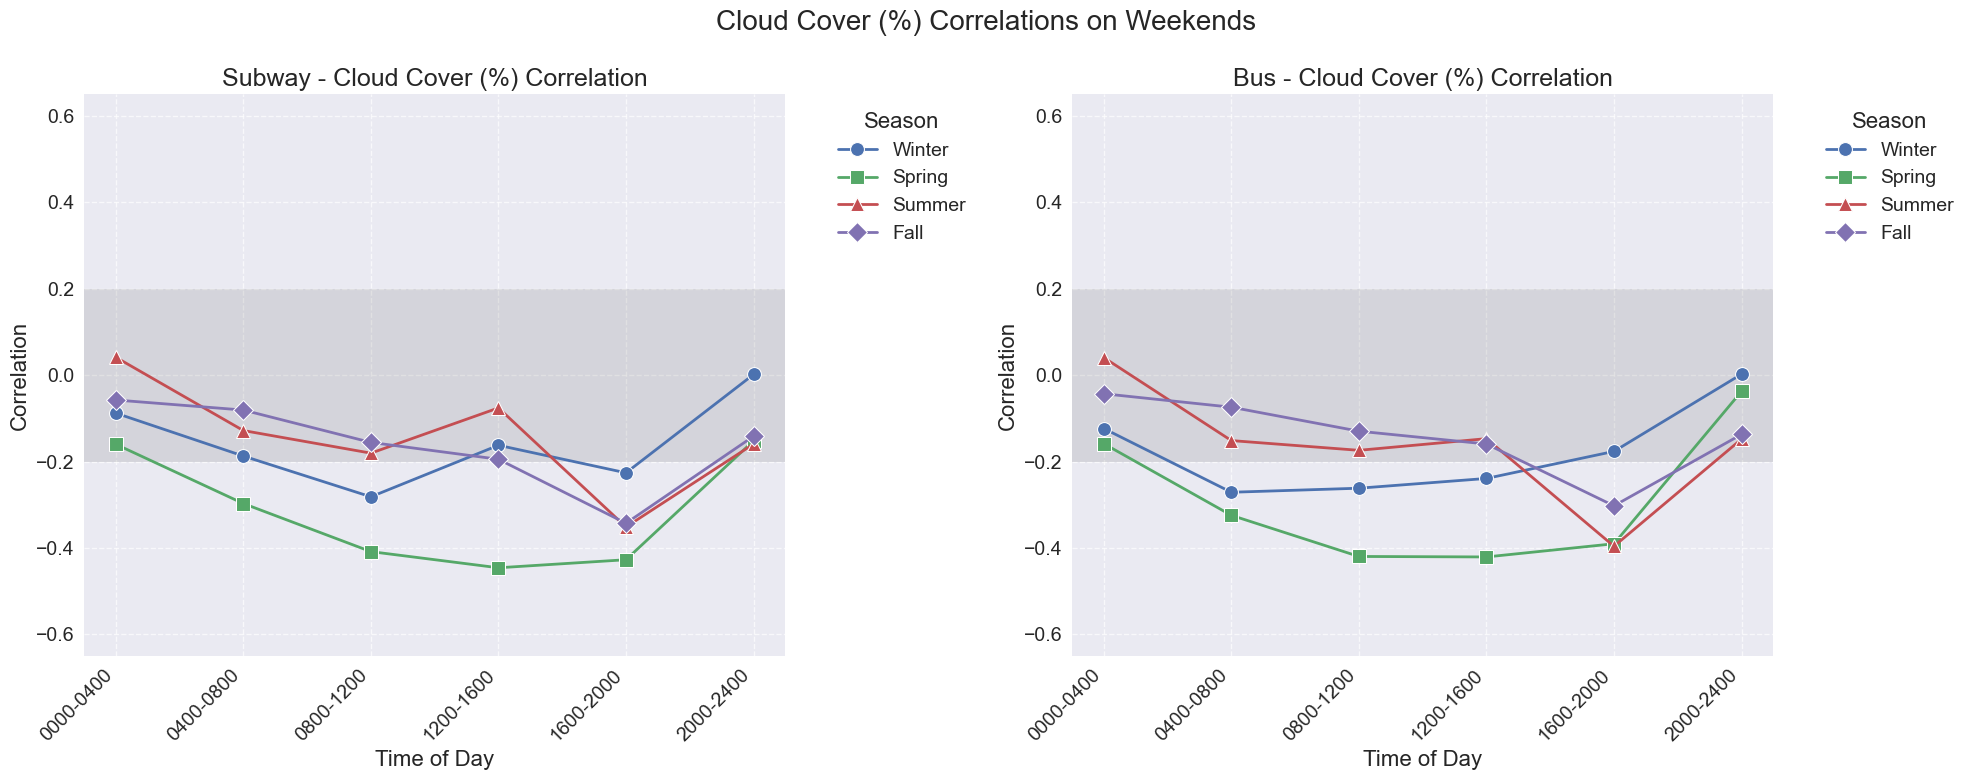


Summary statistics for Weekdays:
                                                               count  \
Transportation Type Season Hour Segment Weather Variable               
Bus                 Fall   00-04        Cloud Cover (%)          1.0   
                                        Precipitation (in)       1.0   
                                        Pressure (inHg)          1.0   
                                        Relative Humidity (%)    1.0   
                                        Temperature (°F)         1.0   
...                                                              ...   
Subway              Winter 20-24        Cloud Cover (%)          1.0   
                                        Precipitation (in)       1.0   
                                        Pressure (inHg)          1.0   
                                        Relative Humidity (%)    1.0   
                                        Temperature (°F)         1.0   

                             

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the default font size for all text elements
plt.rcParams.update({'font.size': 16})

def analyze_all_conditions(combined_df, lag=0):
    seasons = [('Winter', '12-01', '02-28'), ('Spring', '03-01', '05-31'),
               ('Summer', '06-01', '08-31'), ('Fall', '09-01', '11-30')]
    hour_segments = [(0, 4), (4, 8), (8, 12), (12, 16), (16, 20), (20, 24)]
    # hour_segments = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14), (14, 16), (16, 18), (18, 20), (20, 22), (22, 24)]

    day_types = [('Weekday', False), ('Weekend', True)]

    all_results = []

    for season, start_date, end_date in seasons:
        for start_hour, end_hour in hour_segments:
            for day_type, is_weekend in day_types:
                result_df = analyze_weather_impact(
                    combined_df,
                    lag=lag, start_date=start_date, end_date=end_date,
                    hour_range=(start_hour, end_hour), is_weekend=is_weekend,
                    plot=False
                )
                
                result_df['Season'] = season
                result_df['Hour Segment'] = f'{start_hour:02d}-{end_hour:02d}'
                result_df['Season_Hour'] = f'{season}_{start_hour:02d}-{end_hour:02d}'
                result_df['Day Type'] = day_type
                
                all_results.append(result_df)

    return pd.concat(all_results, ignore_index=True)

# Calculate correlations
correlations_df = analyze_all_conditions(combined_df, lag=0)

# Get unique variables
variables = correlations_df['Weather Variable'].unique()

# Define markers for each season
season_markers = {'Winter': 'o', 'Spring': 's', 'Summer': '^', 'Fall': 'D'}

# Function to convert hour segment to military time
def to_military_time(hour_segment):
    start, end = map(int, hour_segment.split('-'))
    return f'{start:02d}00-{end:02d}00'

# Plot for both weekdays and weekends
for day_type in ['Weekday', 'Weekend']:
    day_type_correlations = correlations_df[correlations_df['Day Type'] == day_type]
    
    for variable in variables:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        fig.suptitle(f'{variable} Correlations on {day_type}s', fontsize=20)
        
        for mode, ax in zip(['Subway', 'Bus'], [ax1, ax2]):
            data = day_type_correlations[(day_type_correlations['Transportation Type'] == mode) & 
                                        (day_type_correlations['Weather Variable'] == variable)]
            
            # Add shaded region
            ax.axhspan(-0.2, 0.2, facecolor='gray', alpha=0.2)
            
            for season in ['Winter', 'Spring', 'Summer', 'Fall']:
                season_data = data[data['Season'] == season]
                
                sns.lineplot(data=season_data, x='Hour Segment', y='Correlation', 
                             label=season, marker=season_markers[season], 
                             markersize=10, linewidth=2, ax=ax)
            
            ax.set_title(f'{mode} - {variable} Correlation', fontsize=18)
            ax.set_xlabel('Time of Day', fontsize=16)
            ax.set_ylabel('Correlation', fontsize=16)
            ax.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)
            
            # Convert x-axis labels to military time
            x_labels = [to_military_time(label.get_text()) for label in ax.get_xticklabels()]
            ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)
            
            ax.tick_params(axis='both', which='major', labelsize=14)
            
            ax.grid(True, linestyle='--', alpha=0.7)
            
            # Set y-axis limits to ensure the shaded region is visible
            ax.set_ylim(-0.65, 0.65)

        plt.tight_layout()
        plt.show()

# Display summary statistics for both weekdays and weekends
for day_type in ['Weekday', 'Weekend']:
    print(f"\nSummary statistics for {day_type}s:")
    day_type_correlations = correlations_df[correlations_df['Day Type'] == day_type]
    print(day_type_correlations.groupby(['Transportation Type', 'Season', 'Hour Segment', 'Weather Variable'])['Correlation'].describe())

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_52807/4276897904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data['hour_segment'] = pd.cut(weekend_data['hour'].dt.hour,


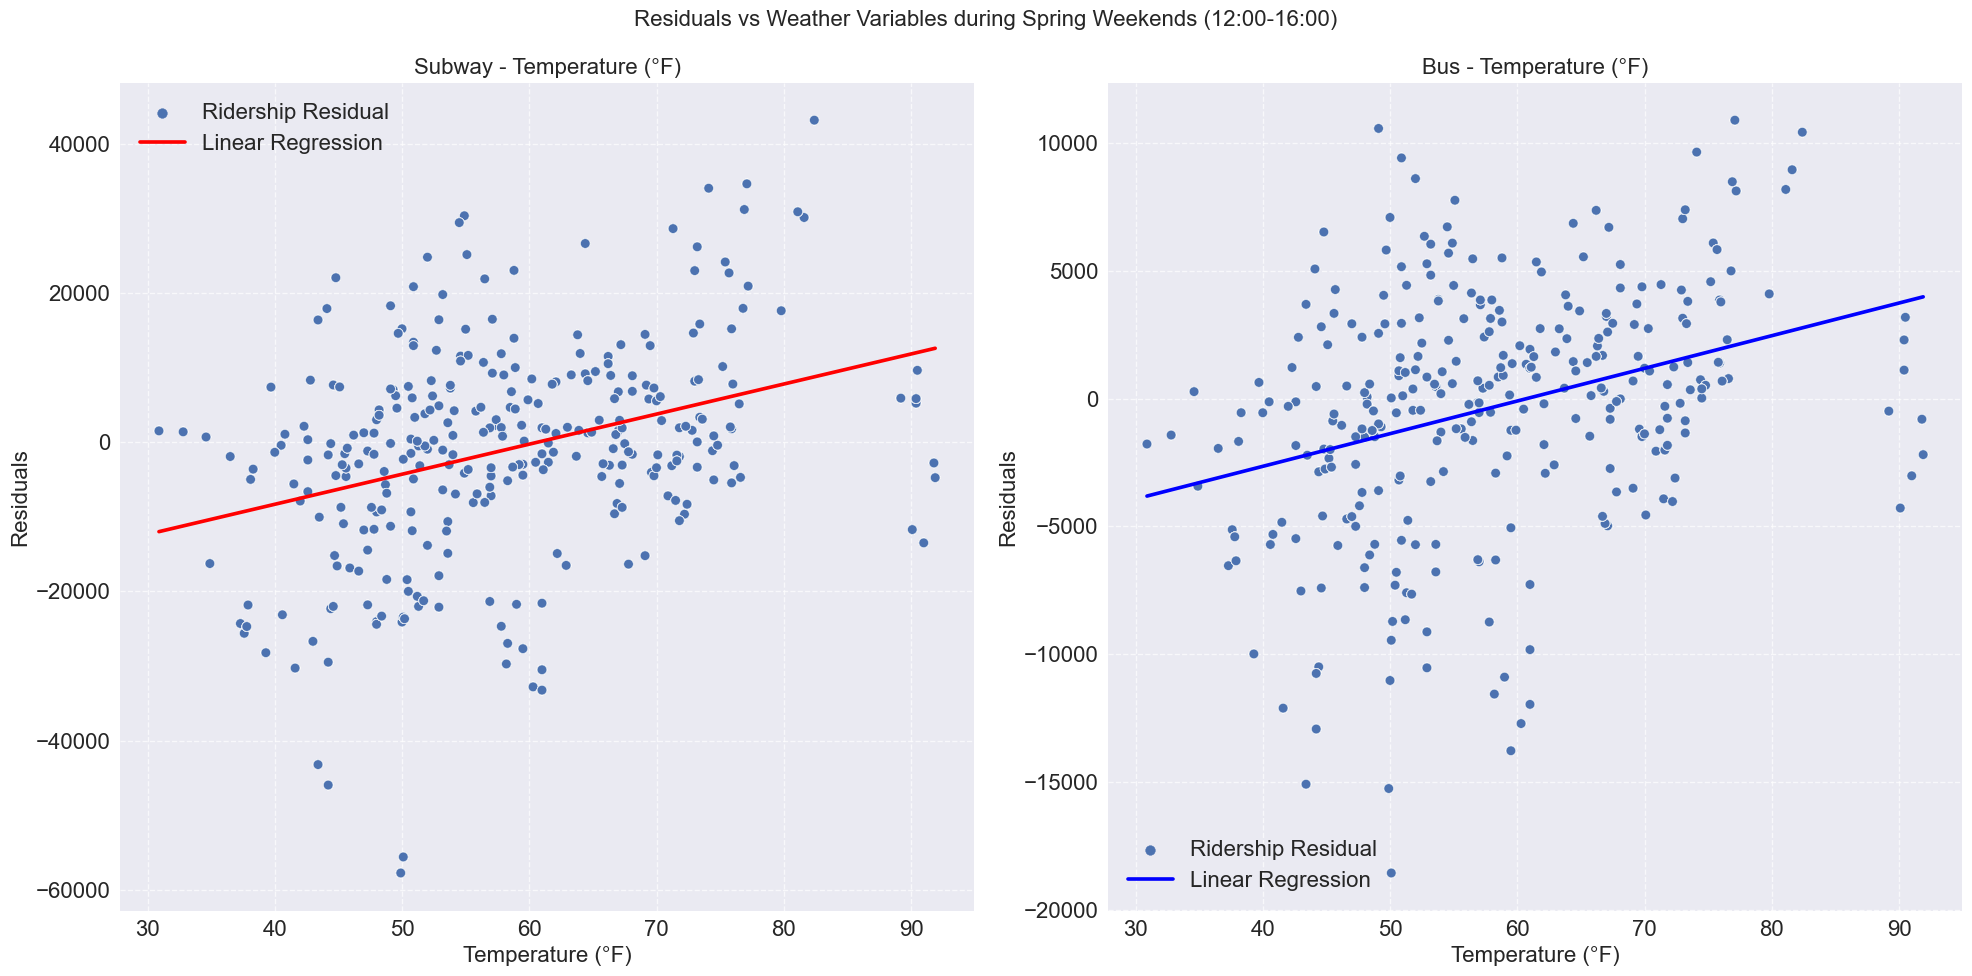

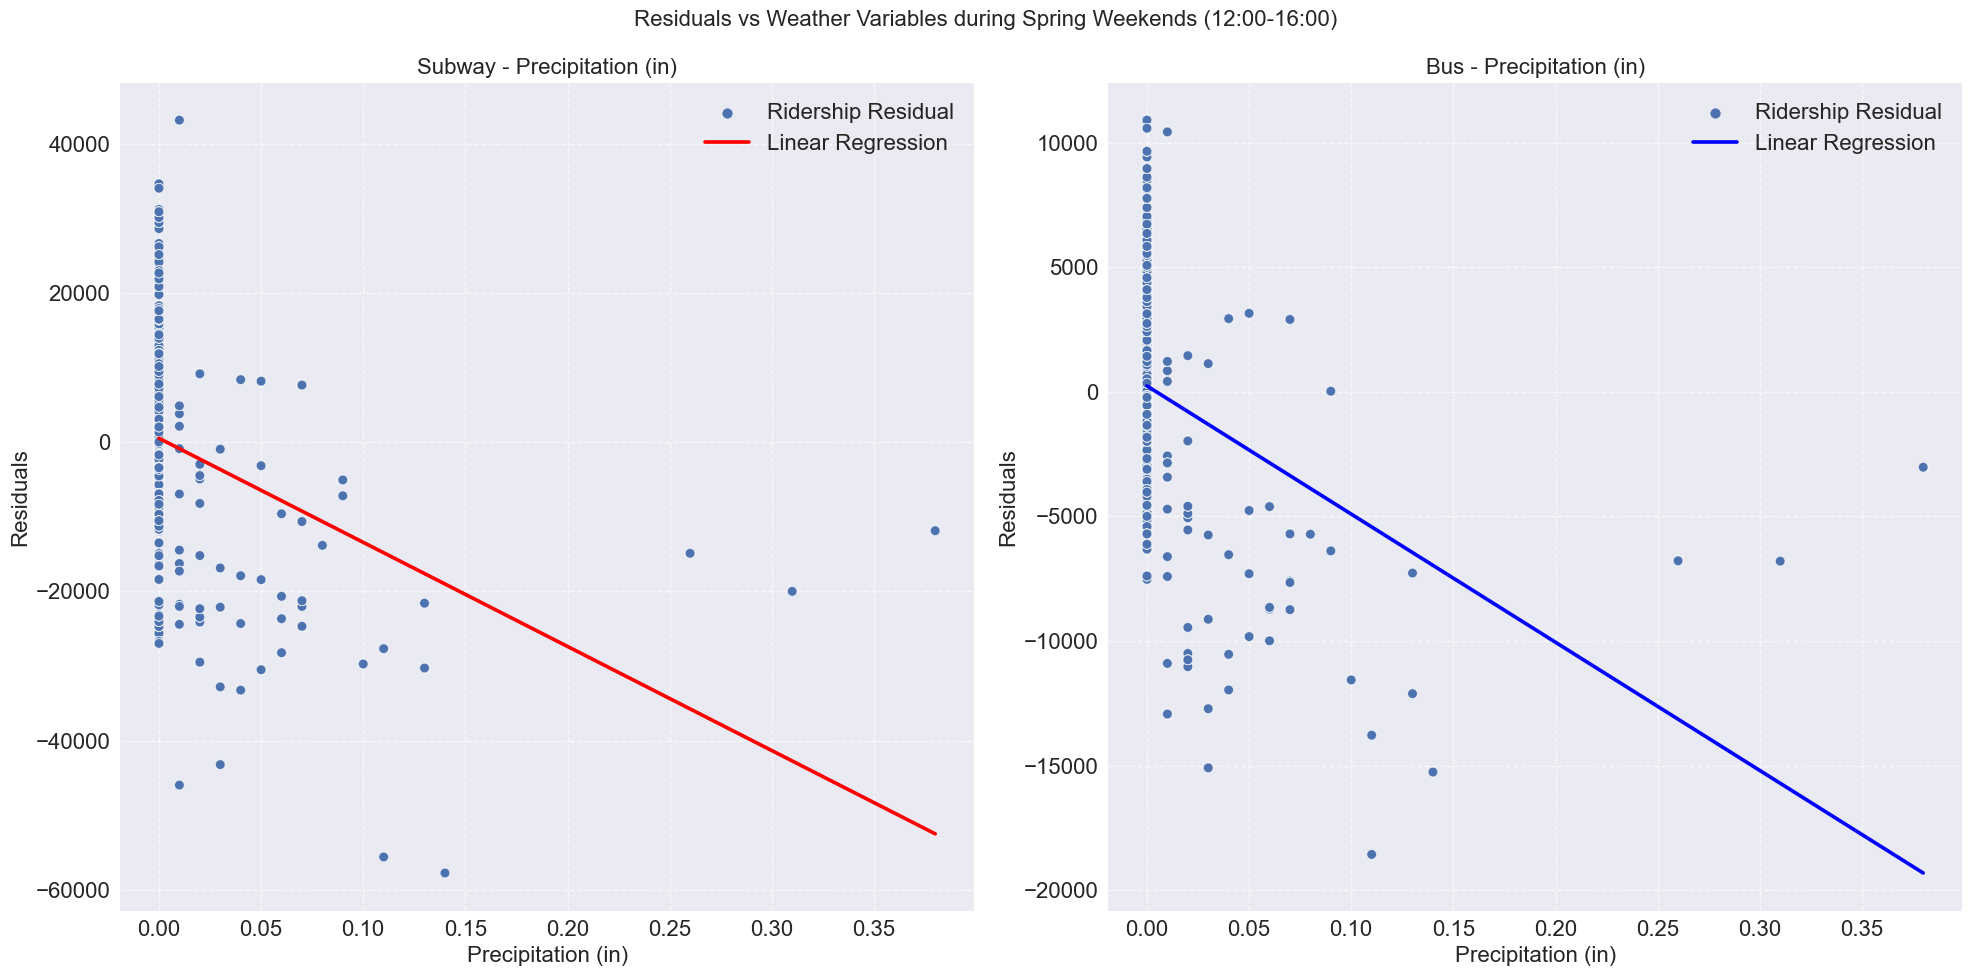

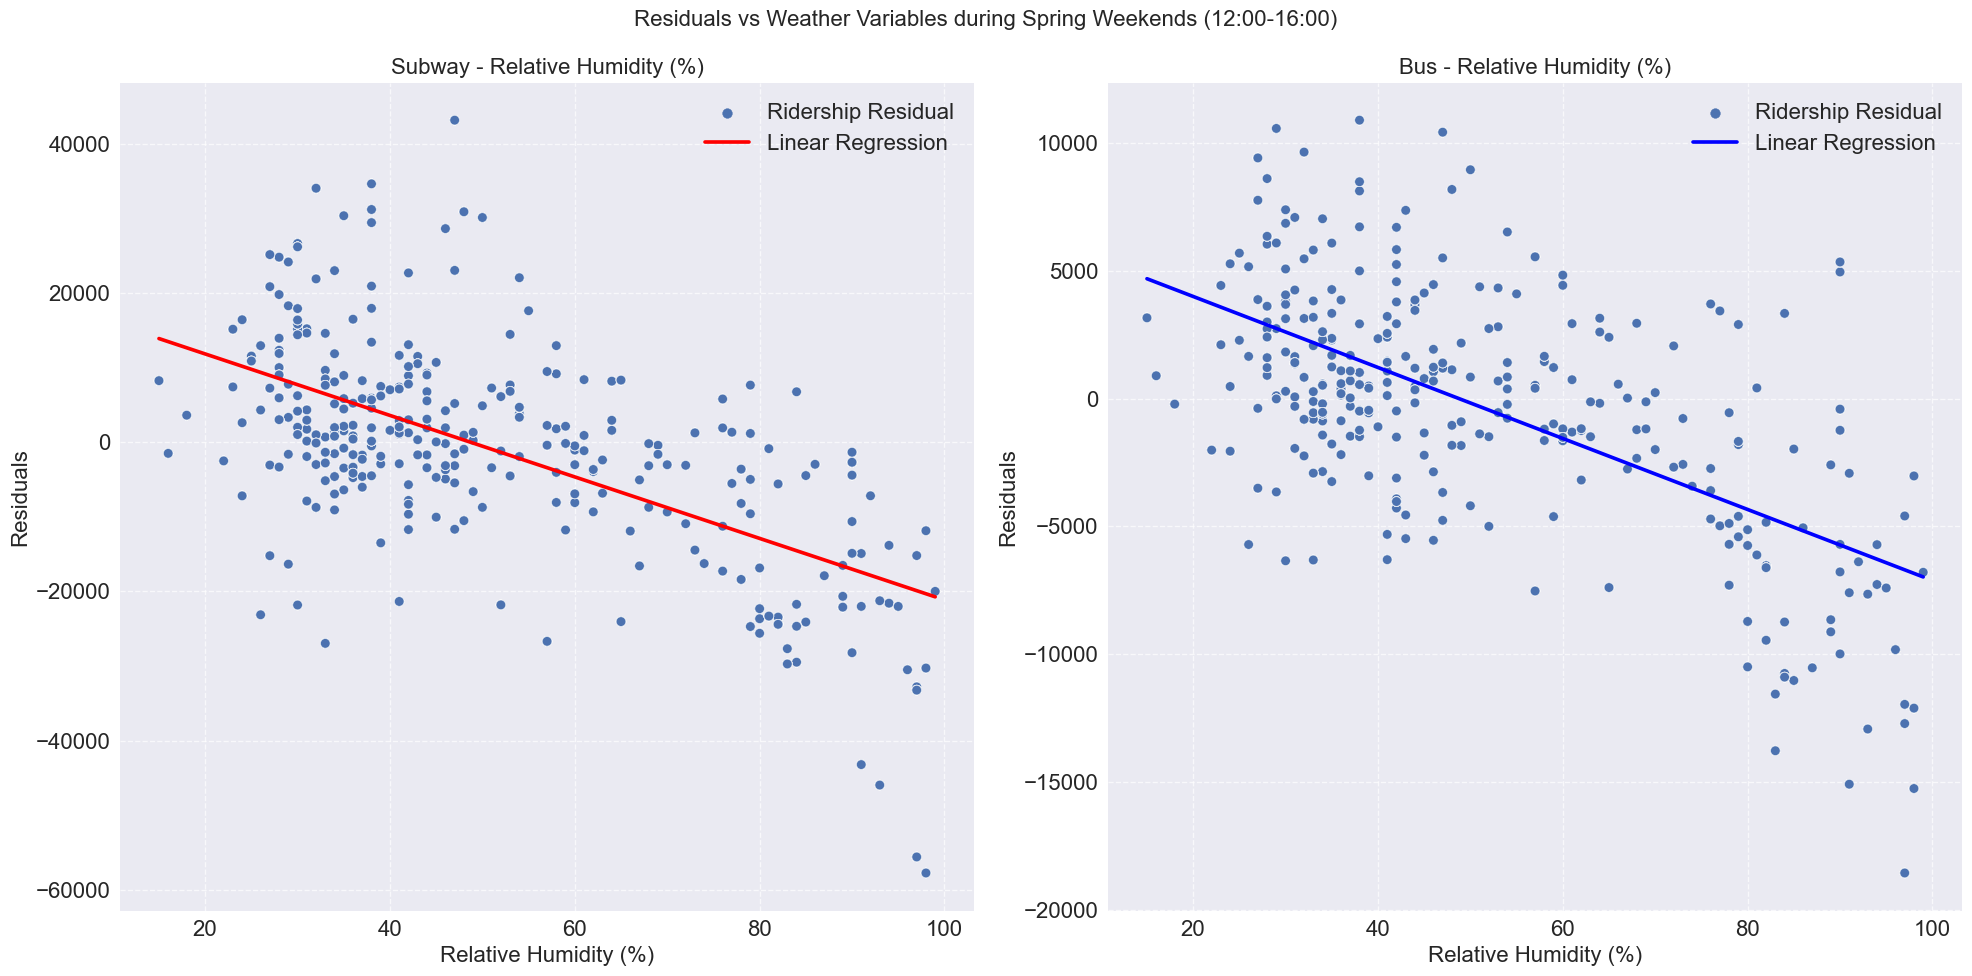

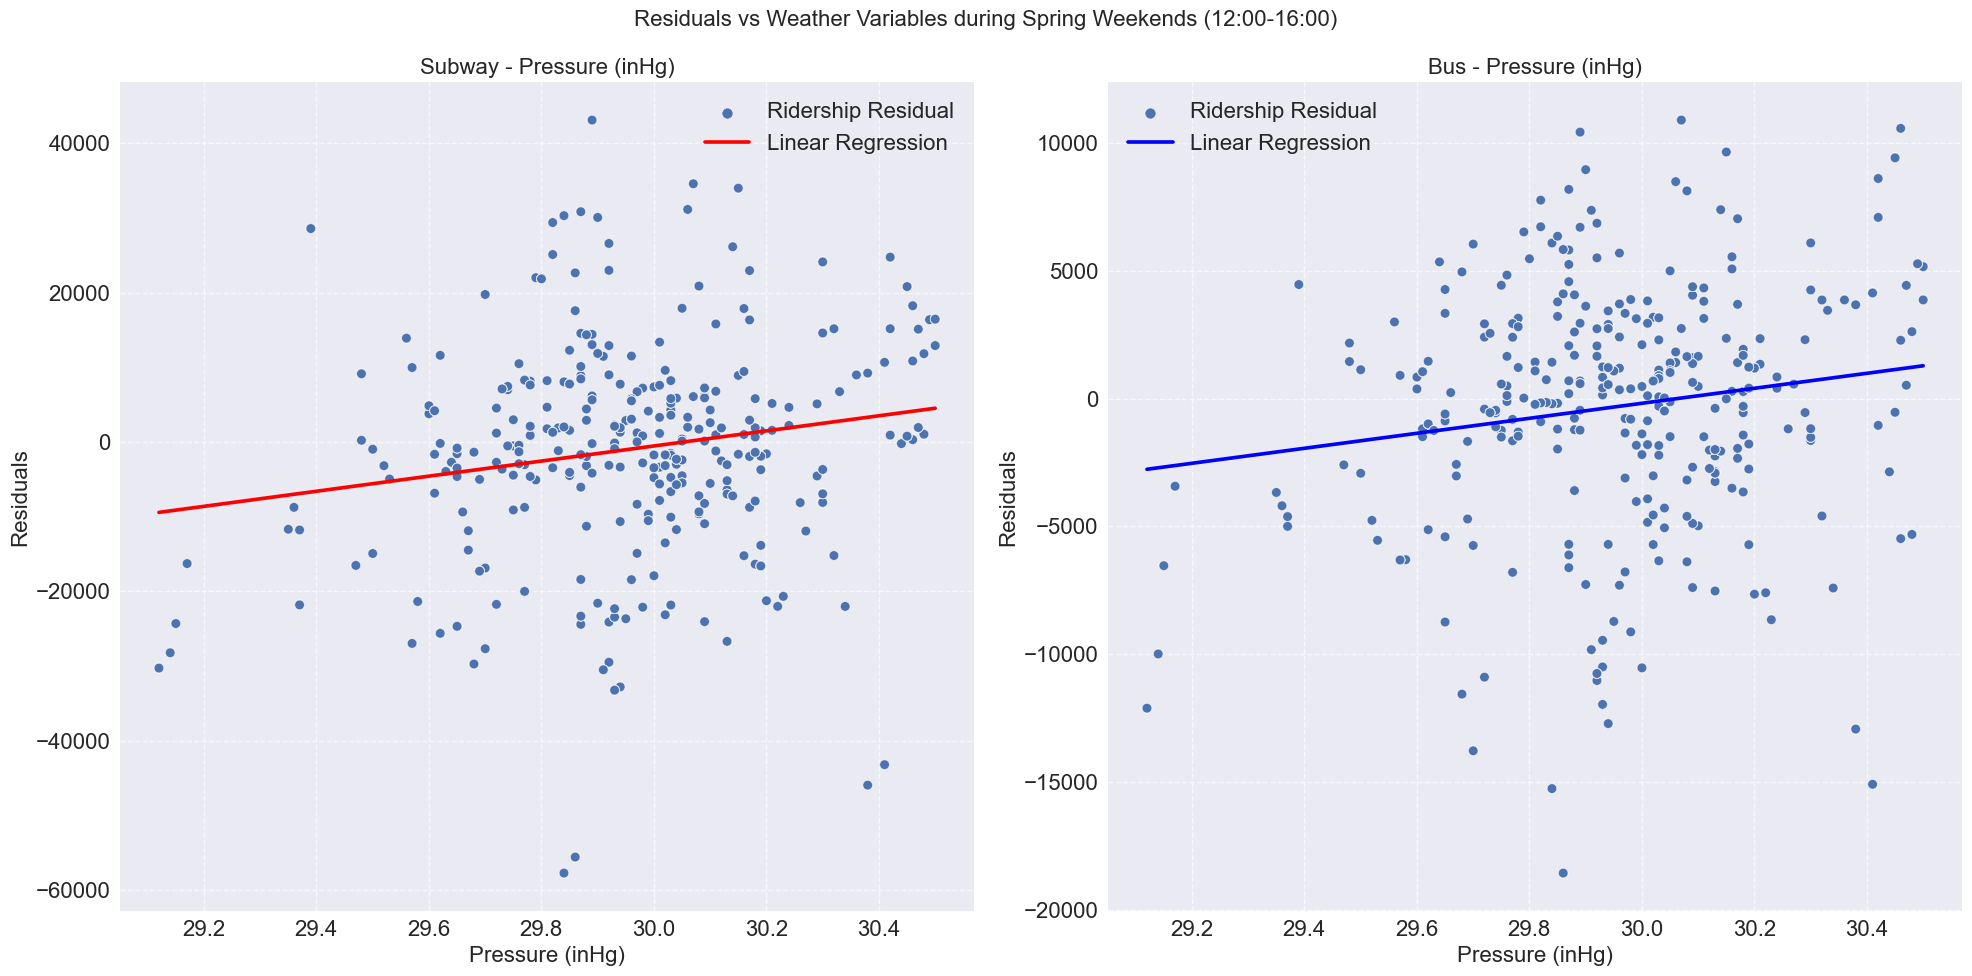

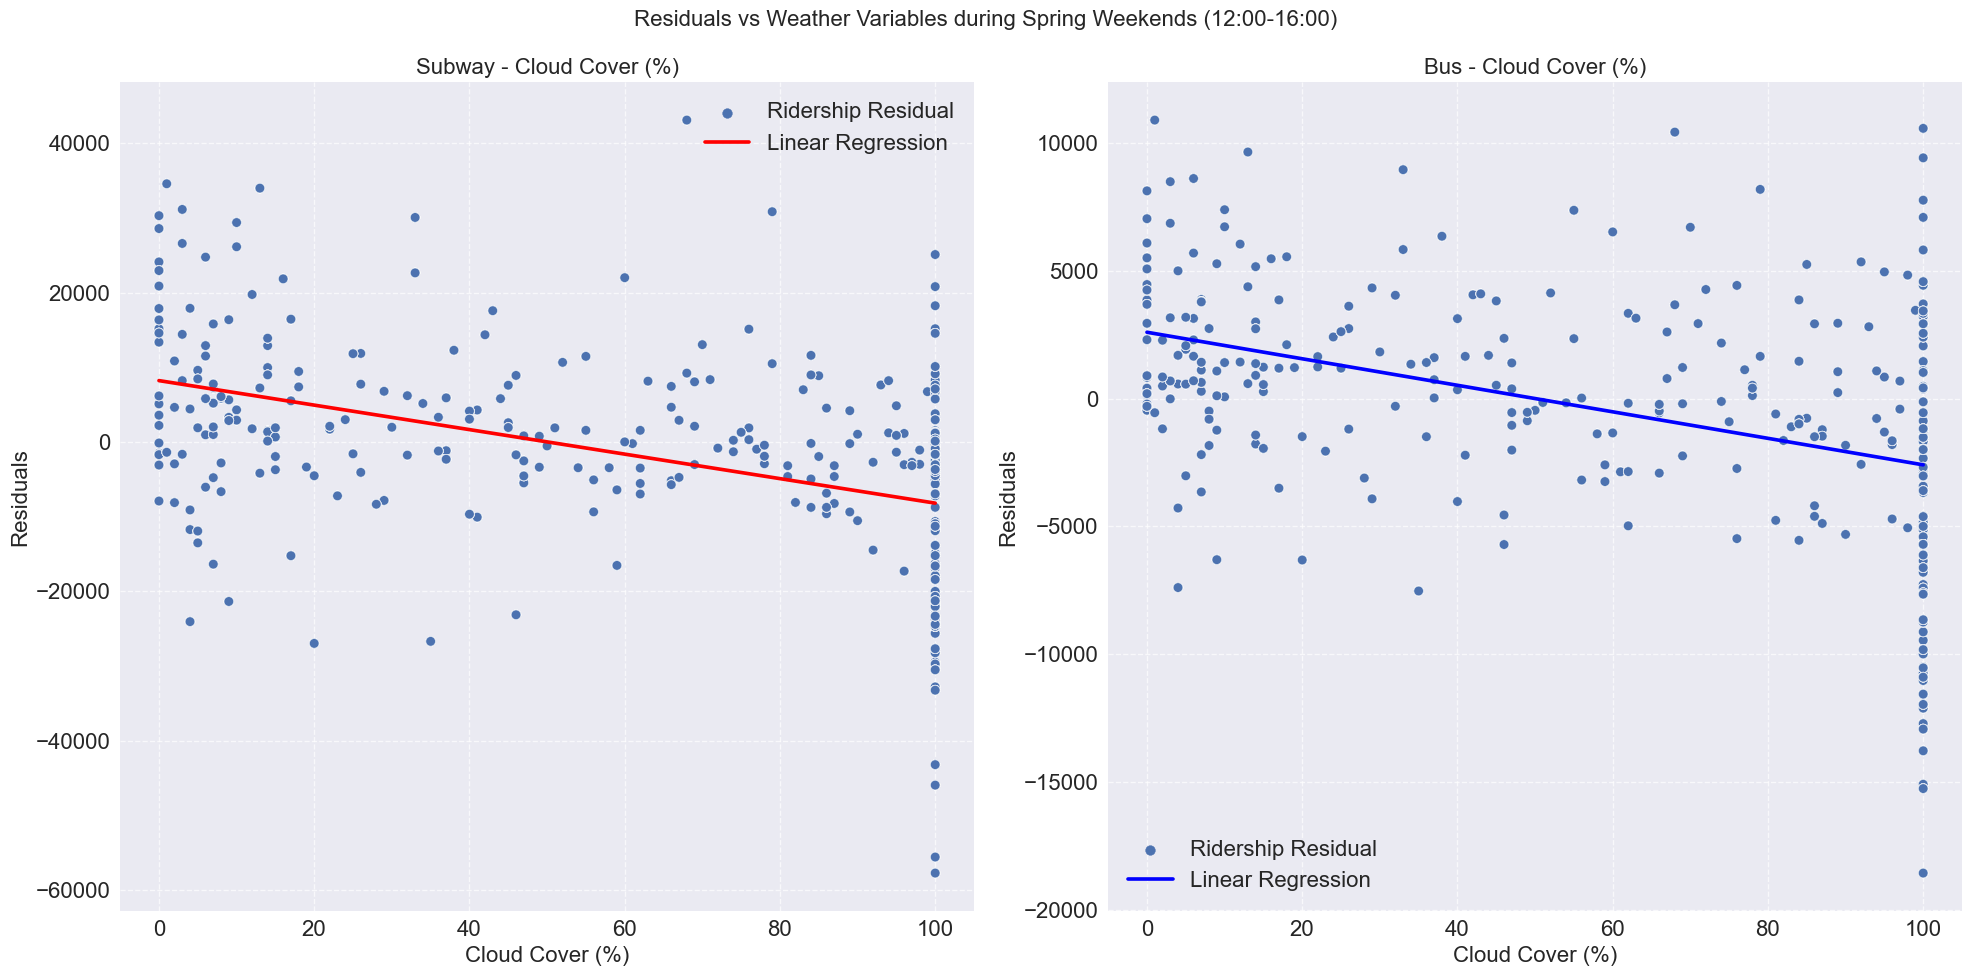

In [16]:
# Filter data for weekends and specified hour segments
weekend_data = combined_df[(combined_df['is_weekend'] == 1) & 
                           ((combined_df['hour'].dt.hour >= 12) & (combined_df['hour'].dt.hour < 16)) & (combined_df['season'] == 'Spring')]

# Create hour_segment column
weekend_data['hour_segment'] = pd.cut(weekend_data['hour'].dt.hour, 
                                      bins=[12, 16], 
                                      labels=['Ridership Residual'], 
                                      include_lowest=True)

weather_vars = ['Temperature (°F)', 'Precipitation (in)', 'Relative Humidity (%)',
                'Pressure (inHg)', 'Cloud Cover (%)']
modes = ['subway', 'bus']

for i, var in enumerate(weather_vars):

    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle('Residuals vs Weather Variables during Spring Weekends (12:00-16:00)', fontsize=16)

    for j, mode in enumerate(modes):
        ax = axs[j]
        
        # Calculate residuals
        residuals = weekend_data[f'{mode}_residual']
        
        # Create scatter plot
        sns.scatterplot(x=weekend_data[var], y=residuals, hue=weekend_data['hour_segment'], 
                        ax=ax, alpha=0.6)
        
        # Add linear regression line without shaded area
        sns.regplot(x=weekend_data[var], y=residuals, scatter=False, ax=ax, 
                    color='red' if mode == 'subway' else 'blue', label='Linear Regression', ci=None)
    
        ax.set_title(f'{mode.capitalize()} - {var}', fontsize=16)
        ax.set_xlabel(var, fontsize=16)
        ax.set_ylabel('Residuals', fontsize=16)
        ax.legend(fontsize=16)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.tick_params(axis='both', which='major', labelsize=16)

    plt.tight_layout()
    plt.show()